In [83]:
!pip install itsdangerous

In [84]:
!pip install python-pptx
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn

In [96]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from datetime import datetime
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew, kurtosis
import time

print("\033[1;34m 1. Загрузка цен закрытия дня для акций и криптовалют. Проверка загруженных данных\033[0m")
# Список акций и криптовалют
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BRK-B', 'NVDA', 'META', 'JPM', 'V']
cryptos = ['SOL-USD', 'ETH-USD', 'BTC-USD', 'XRP-USD', 'USDT-USD']

# Загрузка данных с 2022-01-01
start_date = "2023-01-01"
print("\033[3;34mЗагрузка цен закрытия дня для акций с тикерами 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BRK-B', 'NVDA', 'META', 'JPM', 'V' из индекса S&P500\033[0m")
stock_data = yf.download(stocks, interval="1d", start=start_date)['Close']

print("\033[3;34mЗагрузка цен закрытия дня для криптовалют с тикерами 'SOL-USD', 'ETH-USD', 'BTC-USD', 'XRP-USD', 'USDT-USD'\033[0m")
crypto_data = yf.download(cryptos, interval="1d", start=start_date)['Close']

# Проверка на дублирование данных
def check_duplicates(data):
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print(f"Обнаружено {duplicates} дубликатов.")
    else:
        print("Дубликатов нет.")

# Проверка дубликатов для акций
print("\033[3;34mПроверка дубликатов цен закрытия дня для акций\033[0m")
check_duplicates(stock_data)

# Проверка дубликатов для криптовалют
print("\033[3;34mПроверка дубликатов цен закрытия дня для криптовалют\033[0m")
check_duplicates(crypto_data)
print("=" * 50)  # Сплошная горизонтальная линия

# Функция для проверки пропущенных данных
def check_missing_data(data):
    missing_values = data.isnull().sum()
    if missing_values.sum() == 0:
        print("Пропущенных данных нет.")
    else:
        print("Пропущенные данные:")
        print(missing_values)

# Проверка пропущенных данных для акций
print("\033[3;34mПроверка пропущенных данных для акций\033[0m")
check_missing_data(stock_data)

# Проверка пропущенных данных для криптовалют
print("\033[3;34mПроверка пропущенных данных для криптовалют\033[0m")
check_missing_data(crypto_data)

print("=" * 50)  # Сплошная горизонтальная линия

# Функция для заполнения пропусков
def fill_missing_data(data, method='bfill'):
    if method == 'ffill':
        return data.ffill()  # Заполнение вперед
    elif method == 'bfill':
        return data.bfill()  # Заполнение назад
    elif method == 'mean':
        return data.fillna(data.mean())  # Заполнение средним значением
    elif method == 'median':
        return data.fillna(data.median())  # Заполнение медианным значением
    else:
        raise ValueError("Неизвестный метод заполнения пропусков.")
        
# Заполнение пропусков (если есть)
print("\033[3;34mЗаполнение пропусков в ценах акций (если они есть)\033[0m")

if stock_data.isnull().sum().sum() > 0:
    stock_data = fill_missing_data(stock_data, method='bfill')
    print("Пропуски в акциях заполнены.")
else:
    print("Пропусков в ценах акций нет.")
    
print("\033[3;34mЗаполнение пропусков в ценах криптовалют (если они есть)\033[0m")

if crypto_data.isnull().sum().sum() > 0:
    crypto_data = fill_missing_data(crypto_data, method='bfill')
    print("Пропуски в криптовалютах заполнены.")
else:
    print("Пропусков в ценах криптовалют нет.")
print("=" * 50)  # Сплошная горизонтальная линия
        
# Функция для сохранения данных в CSV
def save_to_csv(data, filename, path="C:/Users/MV/"):
    data.to_csv(f"{path}{filename}.csv")

# Сохранение данных в CSV
save_to_csv(stock_data, "stock_data")
save_to_csv(crypto_data, "crypto_data")

print("\033[1;34mДанные цен закрытия дня для акций и криптовалют сохранены в файлы stock_data.csv и crypto.csv на C:/Users/MV/\033[0m")

 1. Загрузка цен закрытия дня для акций и криптовалют. Проверка загруженных данных
Загрузка цен закрытия дня для акций с тикерами 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BRK-B', 'NVDA', 'META', 'JPM', 'V' из индекса S&P500


[*********************100%***********************]  10 of 10 completed
[                       0%                       ]

Загрузка цен закрытия дня для криптовалют с тикерами 'SOL-USD', 'ETH-USD', 'BTC-USD', 'XRP-USD', 'USDT-USD'


[*********************100%***********************]  5 of 5 completed

Проверка дубликатов цен закрытия дня для акций
Дубликатов нет.
Проверка дубликатов цен закрытия дня для криптовалют
Дубликатов нет.
Проверка пропущенных данных для акций
Пропущенных данных нет.
Проверка пропущенных данных для криптовалют
Пропущенных данных нет.
Заполнение пропусков в ценах акций (если они есть)
Пропусков в ценах акций нет.
Заполнение пропусков в ценах криптовалют (если они есть)
Пропусков в ценах криптовалют нет.
Данные цен закрытия дня для акций и криптовалют сохранены в файлы stock_data.csv и crypto.csv на C:/Users/MV/


In [97]:
# Функция для обнаружения выбросов с использованием IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Функция для обнаружения выбросов с использованием Z-оценка
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[z_scores > threshold]

def detect_outliers_isolation_forest(data, contamination=0.01):
    # Проверяем, есть ли NaN в данных
    if data.isnull().any():
        data = data.ffill().bfill()  # Заполняем NaN
    model = IsolationForest(contamination=contamination)
    predictions = model.fit_predict(data.values.reshape(-1, 1))
    return data[predictions == -1]

# Функция для обнаружения выбросов с использованием DBSCAN
def detect_outliers_dbscan(data, eps=0.5, min_samples=5):
    # Проверяем, есть ли NaN в данных
    if data.isnull().any():
        data = data.ffill().bfill()  # Заполняем NaN
    model = DBSCAN(eps=eps, min_samples=min_samples)
    predictions = model.fit_predict(data.values.reshape(-1, 1))
    return data[predictions == -1]

# Функция для обнаружения выбросов с использованием OneClassSVM
def detect_outliers_oneclasssvm(data, nu=0.01, kernel='rbf', gamma='scale'):
    if data.isnull().any():
        data = data.ffill().bfill()  # Заполняем NaN
    model = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
    predictions = model.fit_predict(data.values.reshape(-1, 1))
    return data[predictions == -1]

# Функция для визуализации данных и выбросов
def plot_data_with_outliers(data, iqr_outliers, zscore_outliers, isolation_forest_outliers, dbscan_outliers, oneclasssvm_outliers, short_term, medium_term, buy_signal, sell_signal, title):
    plt.figure(figsize=(14, 8))
    plt.plot(data, label="Цена закрытия (синий)", color="blue")
    plt.plot(short_term, label=f"Краткосрочная MA ({short_window}-дневная, зеленый)", color="green")
    plt.plot(medium_term, label=f"Среднесрочная EMA ({medium_window}-дневная, красный)", color="red")
    
    # Выбросы
    plt.scatter(iqr_outliers.index, iqr_outliers, color="yellow", label="IQR выбросы")
    plt.scatter(zscore_outliers.index, zscore_outliers, color="orange", label="Z-оценка выбросы")
    plt.scatter(isolation_forest_outliers.index, isolation_forest_outliers, color="pink", label="Isolation Forest выбросы")
    plt.scatter(dbscan_outliers.index, dbscan_outliers, color="purple", label="DBSCAN выбросы")
    plt.scatter(oneclasssvm_outliers.index, oneclasssvm_outliers, color="cyan", label="OneClassSVM выбросы")
    
    # Сигналы на покупку и продажу
    plt.scatter(data.index[buy_signal], data[buy_signal], label="Buy Signal", color="green", marker="^", zorder=5)
    plt.scatter(data.index[sell_signal], data[sell_signal], label="Sell Signal", color="red", marker="v", zorder=5)
    
    # Легенда
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Функция для проверки нормального распределения
def check_normality(data, alpha=0.05):
    stat, p = stats.shapiro(data)
    if p > alpha:
        return f"Нормальное распределение (p={p:.10f})"
    else:
        return f"Не нормальное распределение (p={p:.10f})"

# Функция для отображения Boxplot для всех акций
def plot_boxplot_stocks(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data)
    plt.title("Boxplot для всех акций")
    plt.xticks(rotation=45)
    plt.show()

# Функция для отображения Boxplot для криптовалют в квадрате 2x2
def plot_boxplot_cryptos_2x2(data):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    sns.boxplot(data=data['SOL-USD'], ax=axes[0, 0])
    axes[0, 0].set_title('SOL-USD')
    sns.boxplot(data=data['ETH-USD'], ax=axes[0, 1])
    axes[0, 1].set_title('ETH-USD')
    sns.boxplot(data=data['BTC-USD'], ax=axes[1, 0])
    axes[1, 0].set_title('BTC-USD')
    sns.boxplot(data=data[['XRP-USD', 'USDT-USD']], ax=axes[1, 1])
    axes[1, 1].set_title('XRP-USD и USDT-USD')
    plt.tight_layout()
    plt.show()

# Функция для анализа краткосрочной и среднесрочной торговли
def analyze_trading(data, window_short, window_medium):
    # Вычисление краткосрочной MA (простое среднее)
    short_term = data.rolling(window=window_short).mean()
    
    # Вычисление среднесрочной EMA (экспоненциальное среднее)
    medium_term = data.ewm(span=window_medium, adjust=False).mean()
    
    # Определение сигналов на покупку и продажу
    buy_signal = (short_term < medium_term) & (short_term.shift(1) >= medium_term.shift(1))
    sell_signal = (short_term > medium_term) & (short_term.shift(1) <= medium_term.shift(1))
    
    return short_term, medium_term, buy_signal, sell_signal

# Функция для отображения распределения данных
def plot_distribution(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, color='blue')
    plt.title(title)
    plt.show()

# Функция для отображения Q-Q графика
def plot_qq_plot(data, title):
    plt.figure(figsize=(10, 6))
    qqplot(data, line='s')
    plt.title(title)
    plt.show()

# Функция для проверки нормальности с использованием статистических тестов
def check_normality_tests(data, alpha=0.05):
    # Тест Шапиро-Уилка
    stat, p_shapiro = stats.shapiro(data)
    result_shapiro = "Нормальное " if p_shapiro > alpha else "Не нормальное "
    
    # Тест Колмогорова-Смирнова
    stat, p_ks = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    result_ks = "Нормальное " if p_ks > alpha else "Не нормальное "
    
    # Тест Андерсона-Дарлинга
    result_anderson = stats.anderson(data, dist='norm')
    result_anderson = "Нормальное " if result_anderson.statistic < result_anderson.critical_values[2] else "Не нормальное "
    
    # Тест Лиллиефорса
    stat, p_lilliefors = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    result_lilliefors = "Нормальное " if p_lilliefors > alpha else "Не нормальное "
    
    return {
        "Шапиро-Уилка": result_shapiro,
        "Колмогорова-Смирнова": result_ks,
        "Андерсона-Дарлинга": result_anderson,
        "Лиллиефорса": result_lilliefors
    }

# Функция для оценки асимметрии и эксцесса
def check_skewness_kurtosis(data):
    skewness = skew(data)
    kurt = kurtosis(data)
    return {
        "Асимметрия": round(skewness, 6),
        "Эксцесс": round(kurt, 6)
    }
print("\033[1;34mНеобходимые функции\033[0m")
print("=" * 50)  # Сплошная горизонтальная линия

Необходимые функции


 2. Отображение графиков загруженных акций и криптовалют


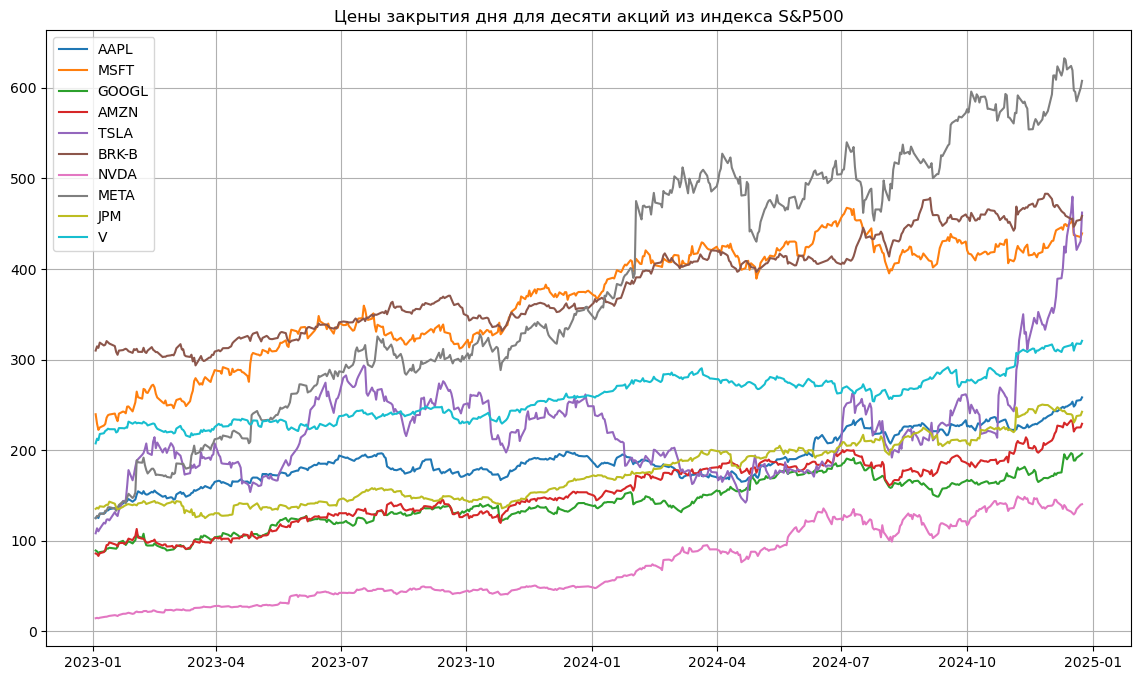

Графики цен десяти загруженных акций на одном графике
Графики цен пяти криптовалют в квадрате 2x2


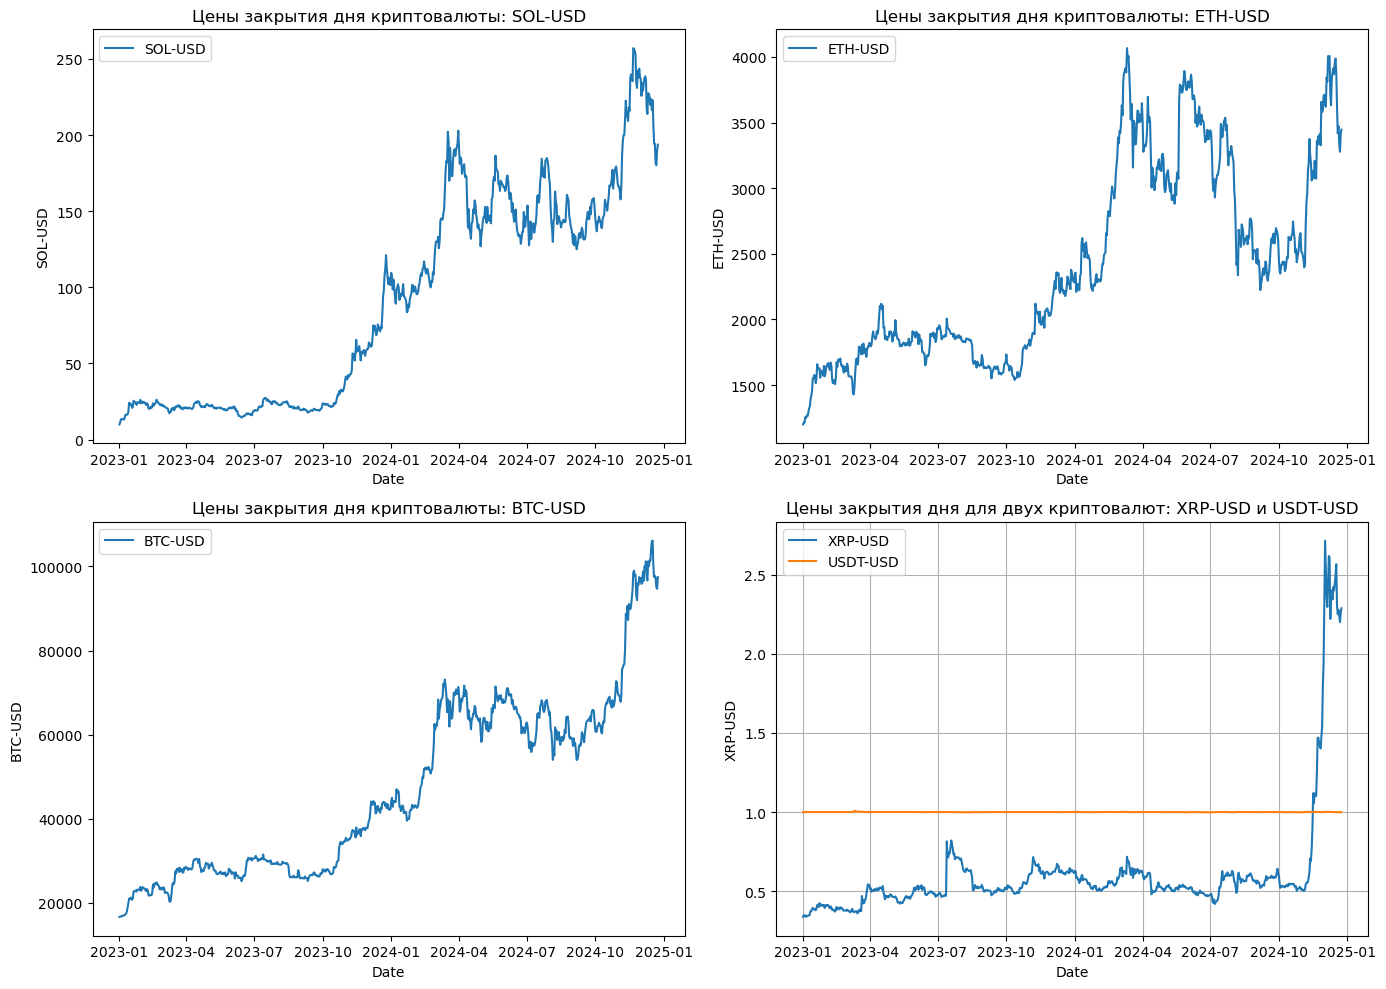

In [98]:
print("\033[1;34m 2. Отображение графиков загруженных акций и криптовалют\033[0m")

# Отображение графиков десяти загруженных акций
plt.figure(figsize=(14, 8))
for stock in stocks:
    plt.plot(stock_data[stock], label=stock)
plt.title("Цены закрытия дня для десяти акций из индекса S&P500")
plt.legend()
plt.grid()
plt.show()
print("\033[3;34mГрафики цен десяти загруженных акций на одном графике\033[0m")

# Отображение графиков пяти загруженных криптовалют в квадрате 2x2
print("\033[3;34mГрафики цен пяти криптовалют в квадрате 2x2\033[0m")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.lineplot(data=crypto_data['SOL-USD'], ax=axes[0, 0], label='SOL-USD')
axes[0, 0].set_title('Цены закрытия дня криптовалюты: SOL-USD')
sns.lineplot(data=crypto_data['ETH-USD'], ax=axes[0, 1], label='ETH-USD')
axes[0, 1].set_title('Цены закрытия дня криптовалюты: ETH-USD')
sns.lineplot(data=crypto_data['BTC-USD'], ax=axes[1, 0], label='BTC-USD')
axes[1, 0].set_title('Цены закрытия дня криптовалюты: BTC-USD')

# Код для отображения двух криптовалют на одном графике
for crypto in ['XRP-USD', 'USDT-USD']:
    sns.lineplot(data=crypto_data[crypto], ax=axes[1, 1], label=crypto)
axes[1, 1].set_title('Цены закрытия дня для двух криптовалют: XRP-USD и USDT-USD')
plt.tight_layout()
plt.grid()
plt.show()

3. Анализ выбросов в загруженых данных, скользящие средние и сигналы на покупку/продажу для акций
Сигналы на покупку/продажу определяются при пересечении 20-дневной простой средней и 40-дневной экспоненциальной средней


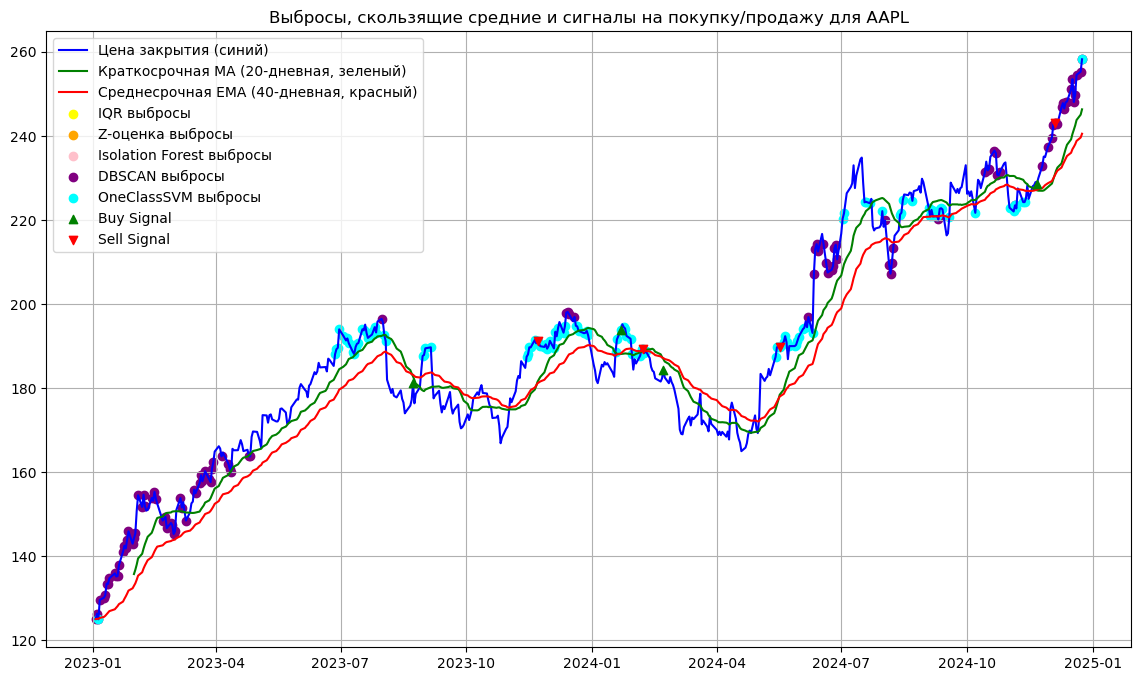

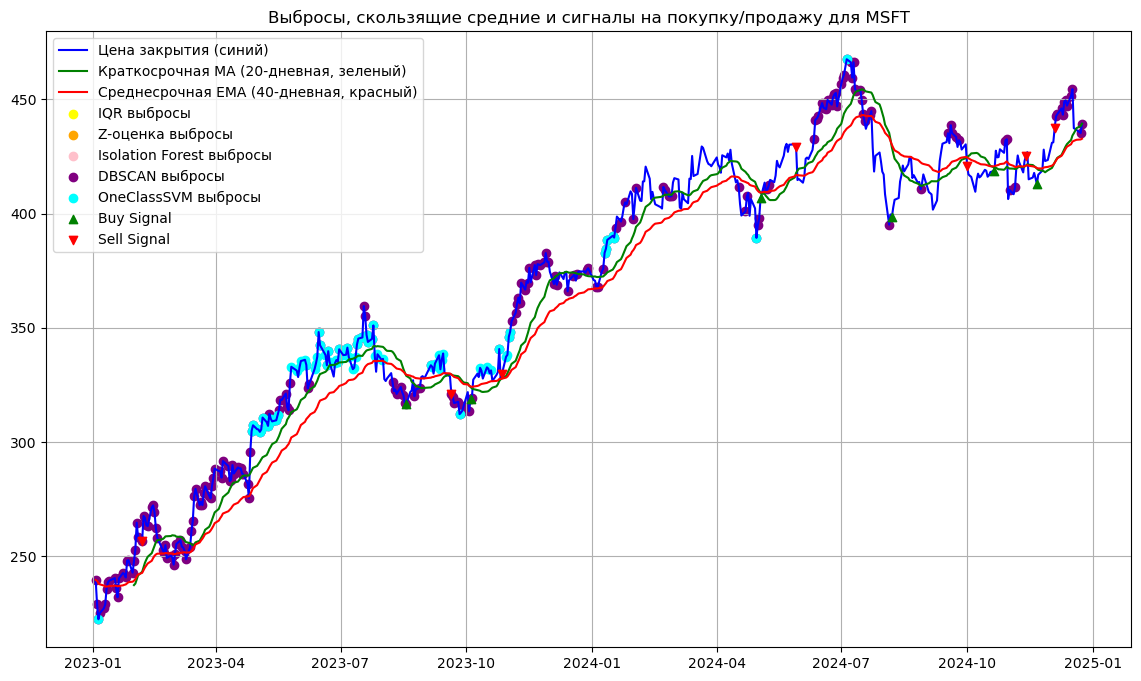

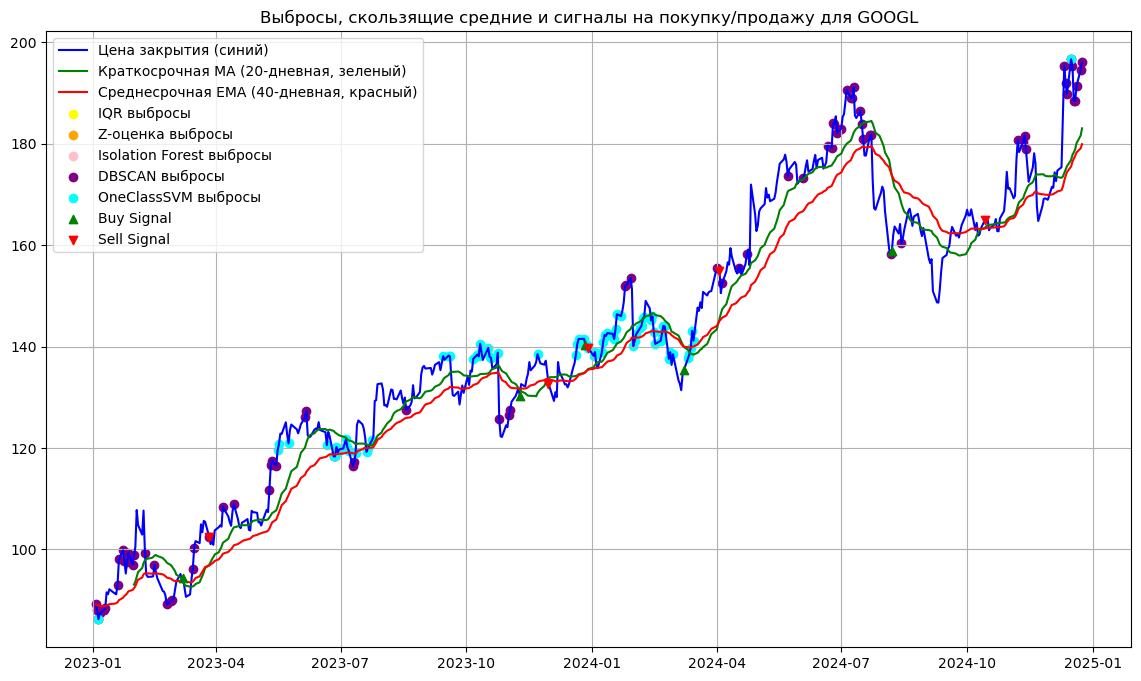

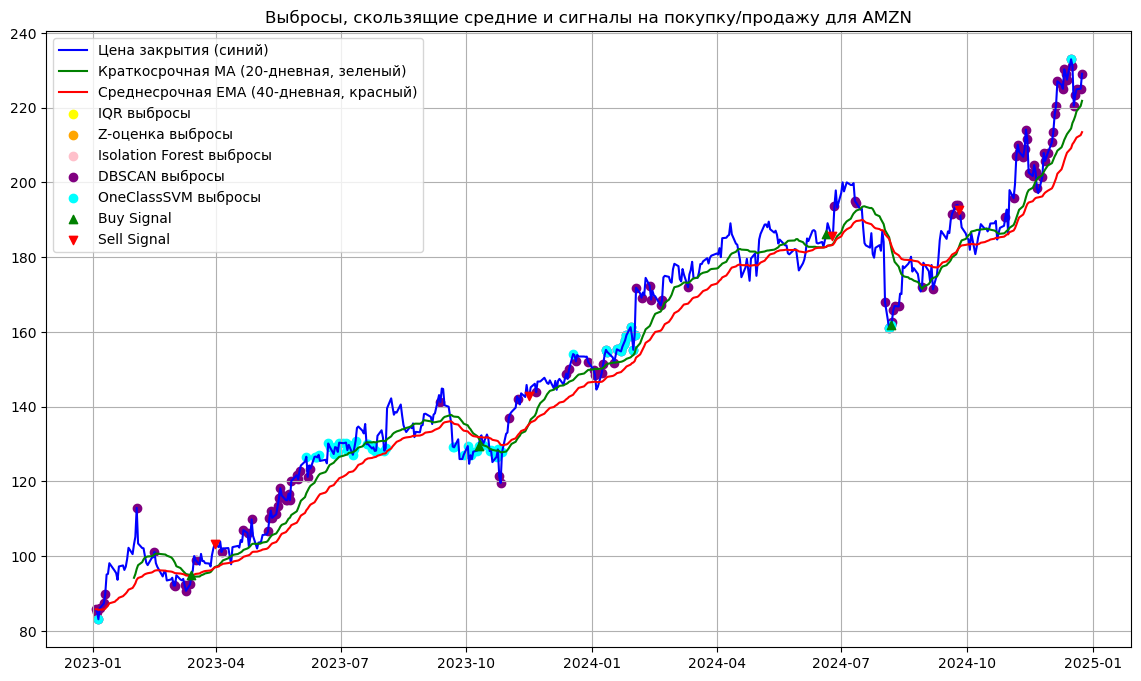

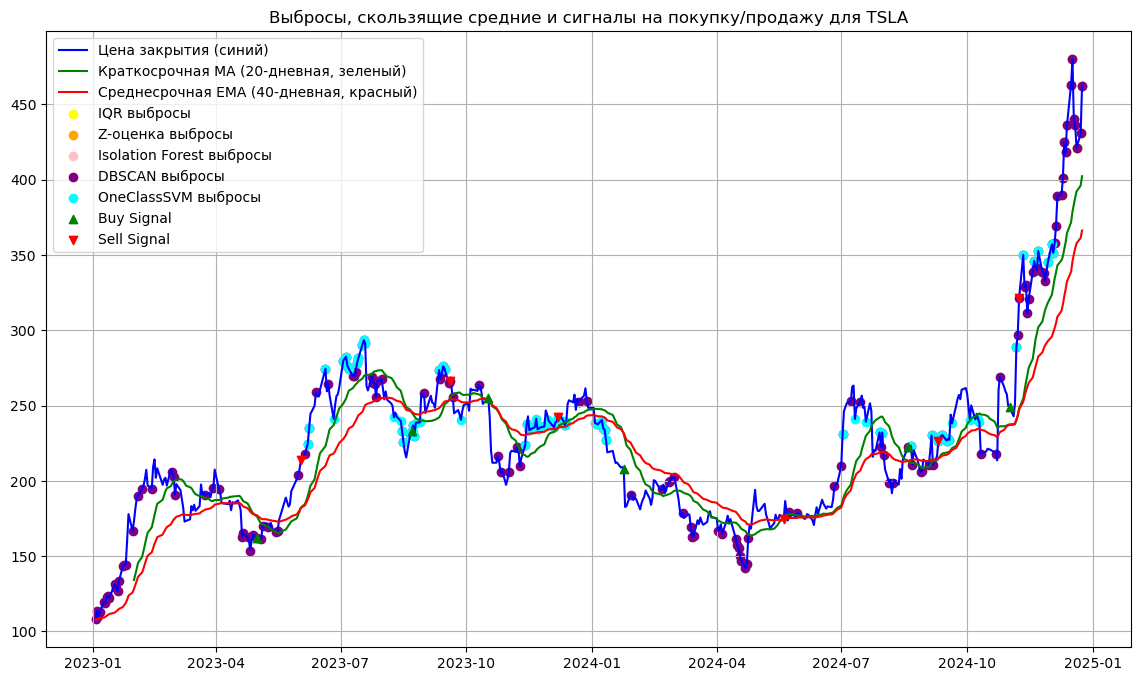

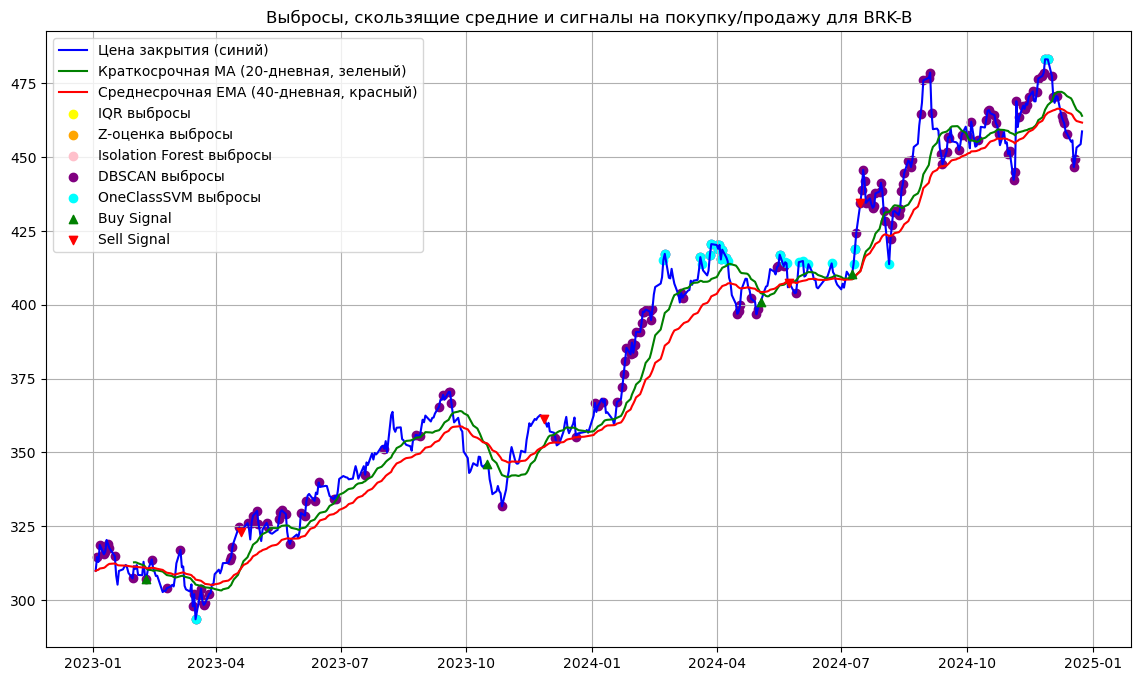

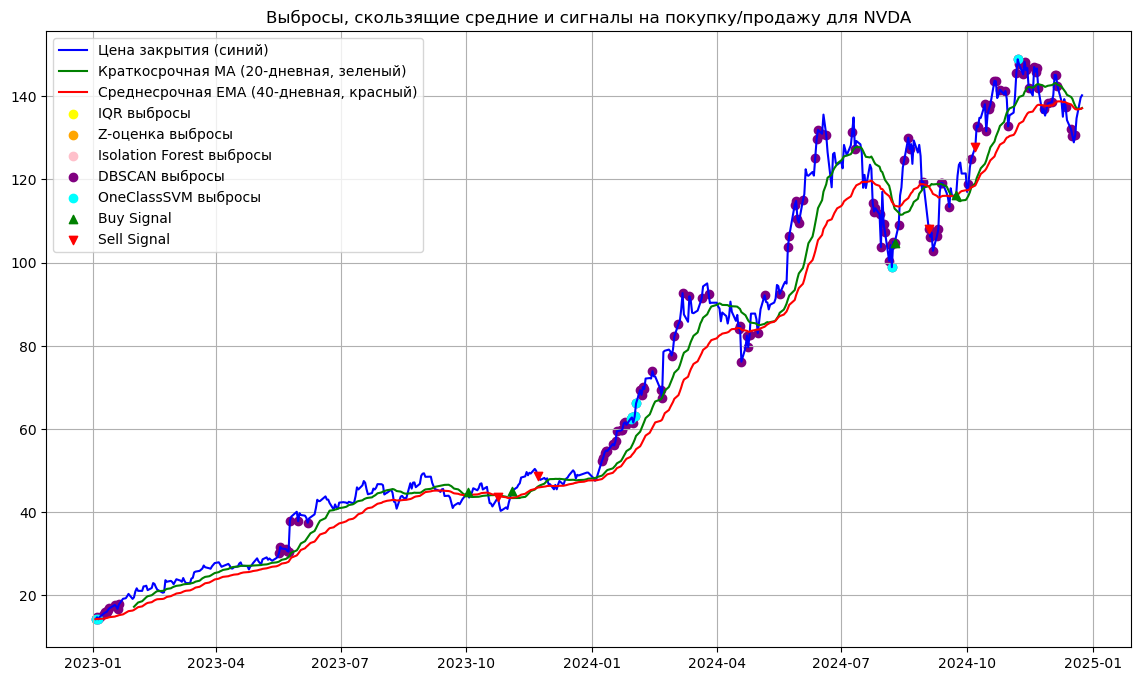

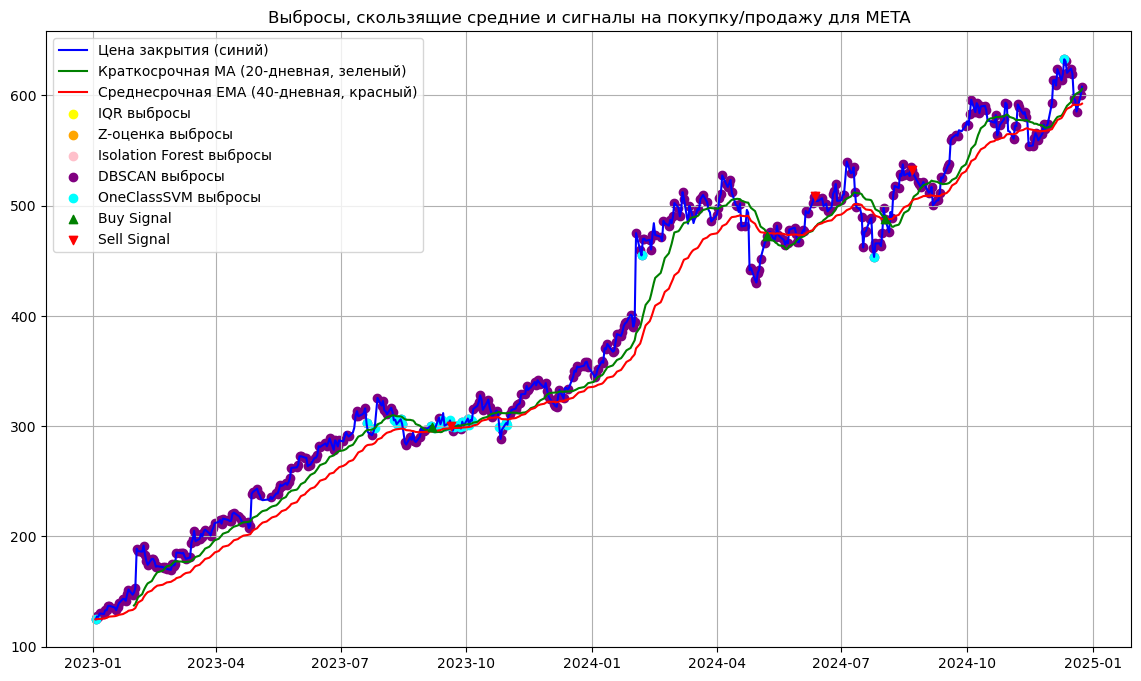

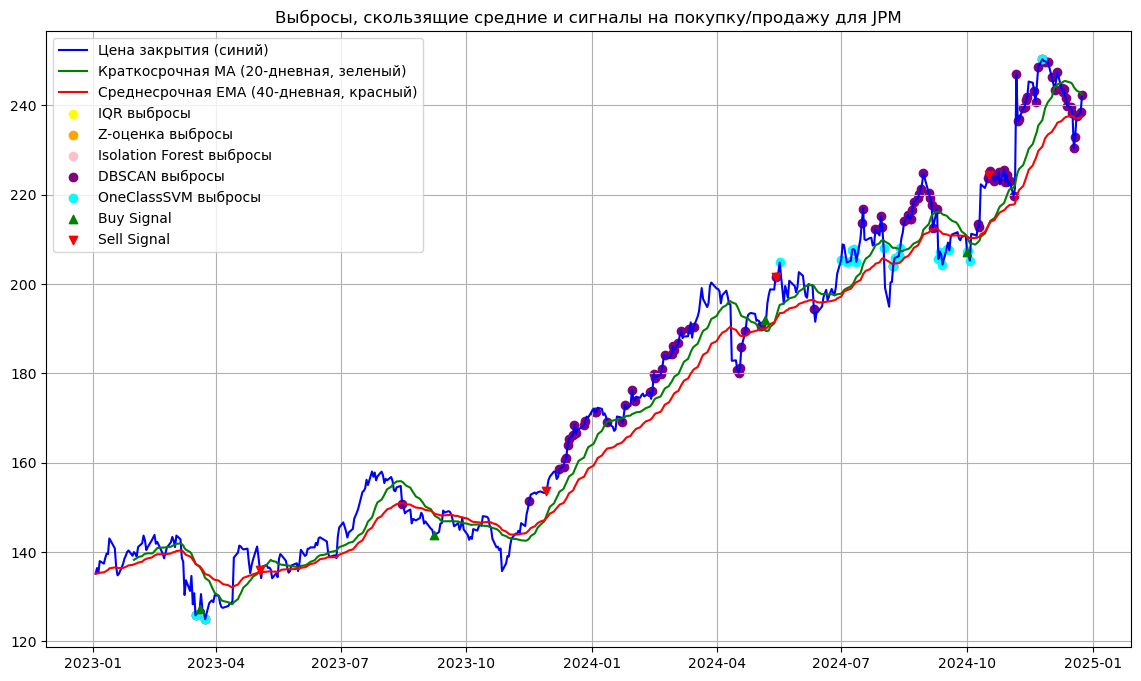

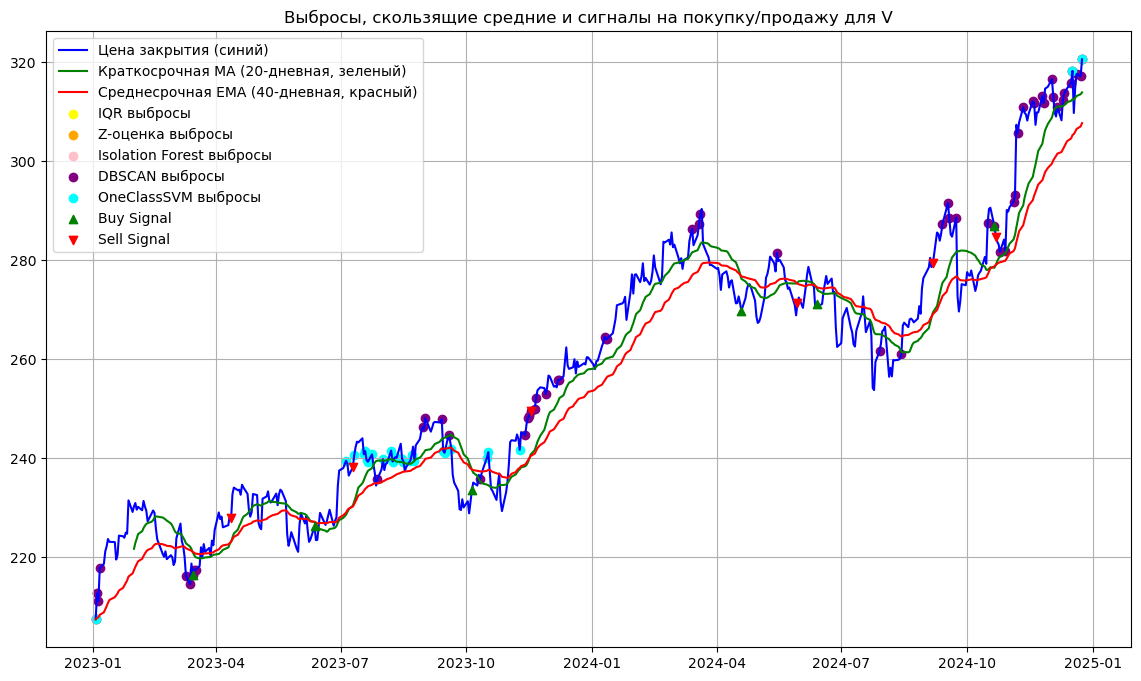

In [99]:
print("\033[1;34m3. Анализ выбросов в загруженых данных, скользящие средние и сигналы на покупку/продажу для акций\033[0m")
print("Сигналы на покупку/продажу определяются при пересечении 20-дневной простой средней и 40-дневной экспоненциальной средней")
# Установка параметров для краткосрочной MA и среднесрочной EMA
short_window = 20
medium_window = 40

# Анализ выбросов для акций
stock_outliers = {stock: {} for stock in stocks}
stock_skewness_kurtosis = {stock: {} for stock in stocks}
for stock in stocks:
    stock_series = stock_data[stock]
    iqr_outliers = detect_outliers_iqr(stock_series)
    zscore_outliers = detect_outliers_zscore(stock_series)
    isolation_forest_outliers = detect_outliers_isolation_forest(stock_series)
    dbscan_outliers = detect_outliers_dbscan(stock_series)
    oneclasssvm_outliers = detect_outliers_oneclasssvm(stock_series)

    # Сохранение количества выбросов
    stock_outliers[stock] = {
        "IQR": len(iqr_outliers),
        "Z-оценка": len(zscore_outliers),
        "Isolation Forest": len(isolation_forest_outliers),
        "DBSCAN": len(dbscan_outliers),
        "OneClassSVM": len(oneclasssvm_outliers)
    }

    # Оценка асимметрии и эксцесса
    stock_skewness_kurtosis[stock] = check_skewness_kurtosis(stock_series)

    # Визуализация выбросов для всех методов на одном графике
    short_term, medium_term, buy_signal, sell_signal = analyze_trading(stock_series, short_window, medium_window)
    plot_data_with_outliers(stock_series, iqr_outliers, zscore_outliers, isolation_forest_outliers, dbscan_outliers, oneclasssvm_outliers, short_term, medium_term, buy_signal, sell_signal, f"Выбросы, скользящие средние и сигналы на покупку/продажу для {stock}")

# Разделительная сплошная линия между данными по инструментам
print("=" * 100)

4. Анализ выбросов в загруженых данных, скользящие средние и сигналы на покупку/продажу для криптовалют
Сигналы на покупку/продажу определяются при пересечении 20-дневной простой средней и 40-дневной экспоненциальной средней


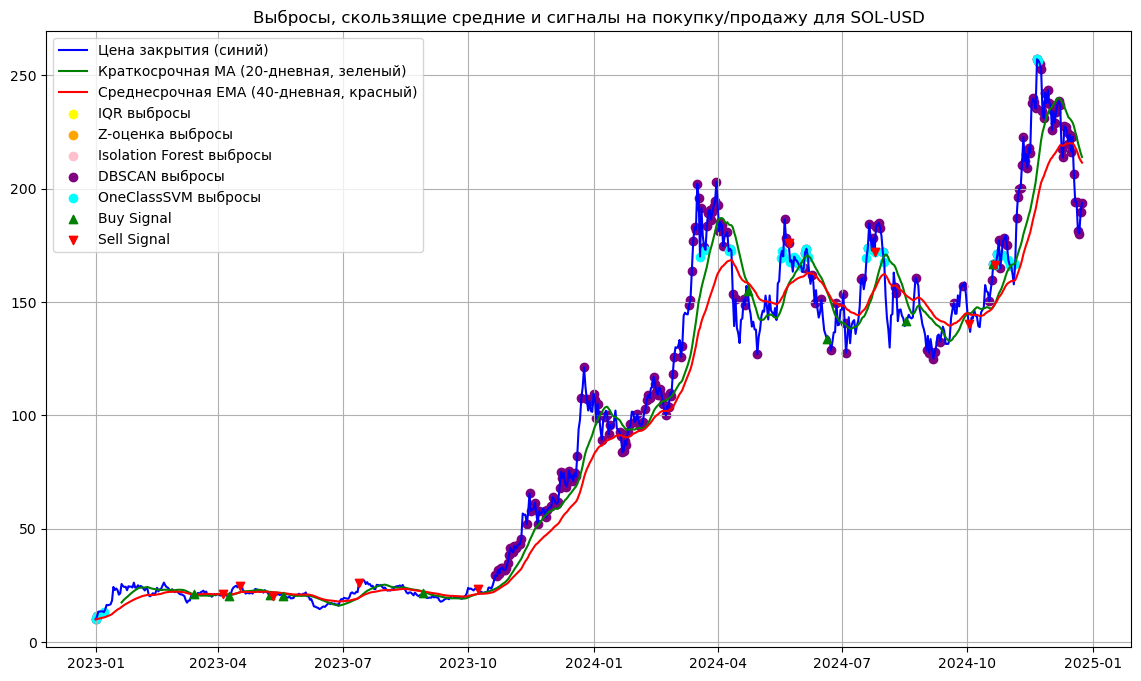

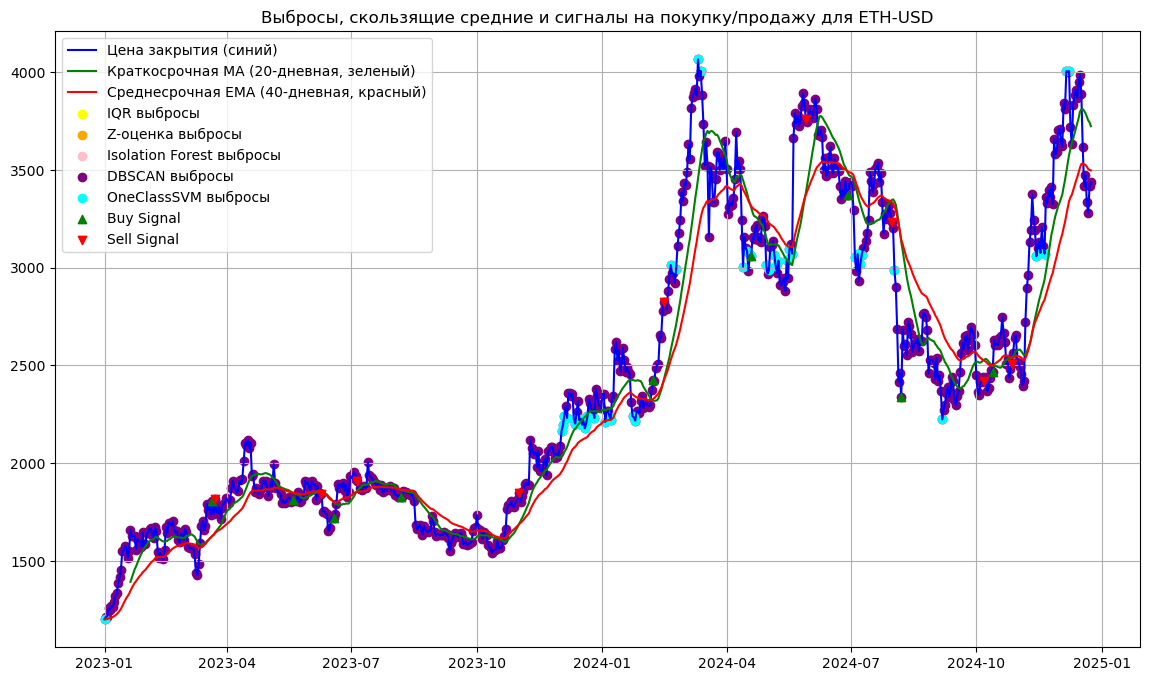

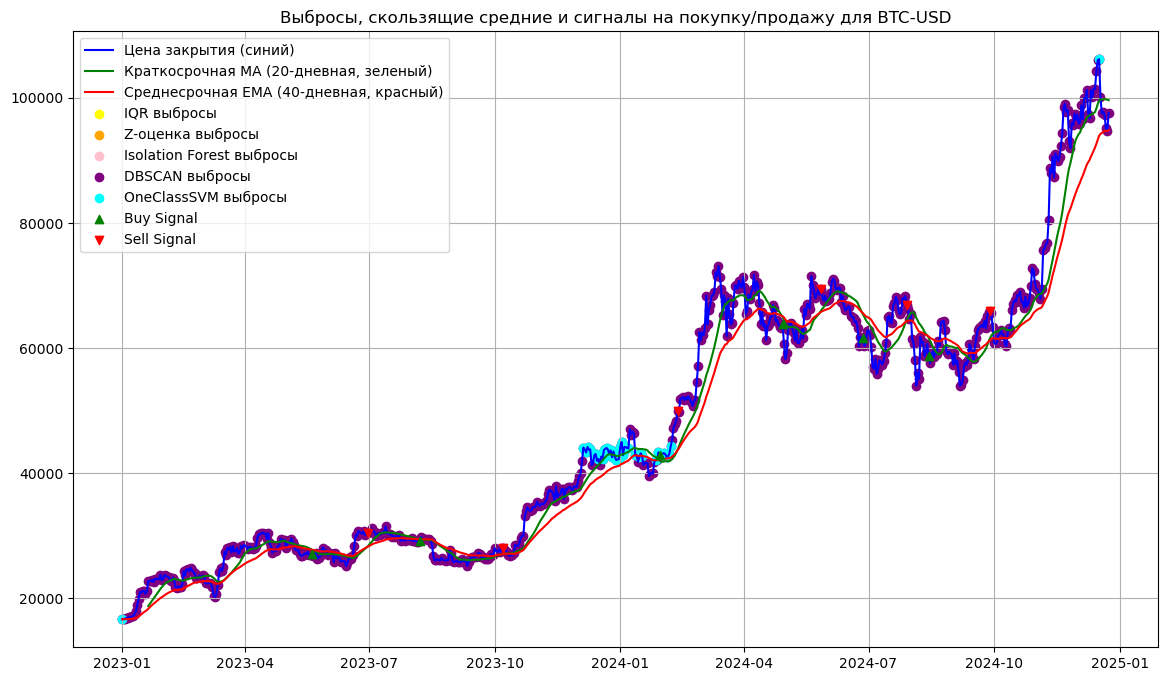

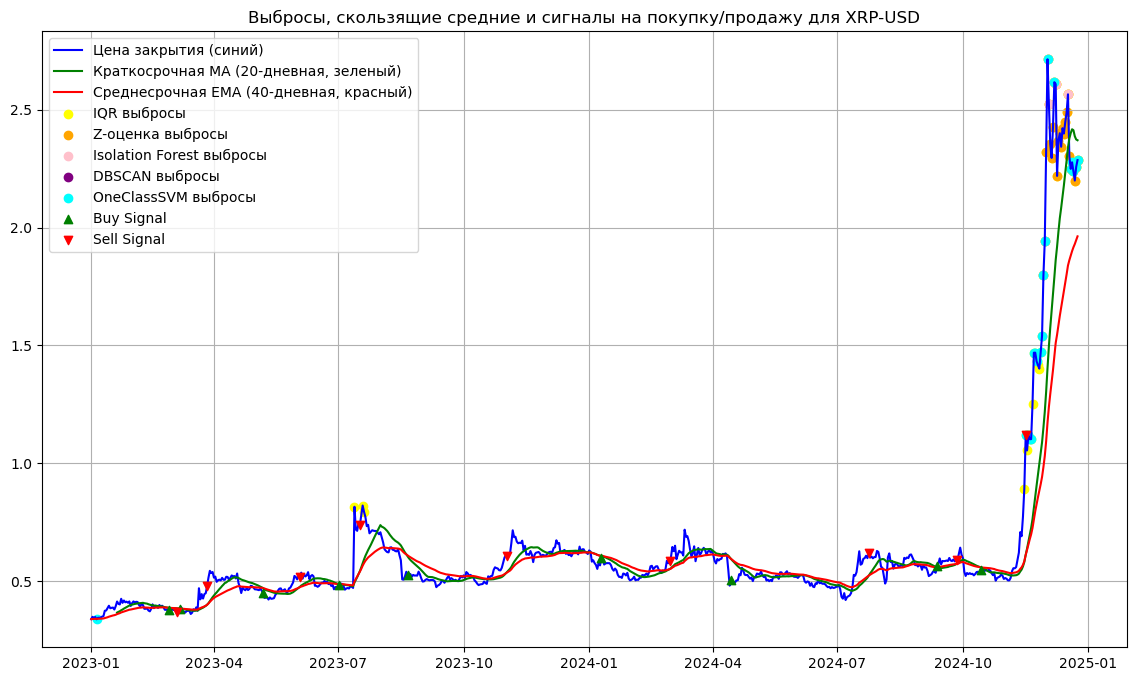

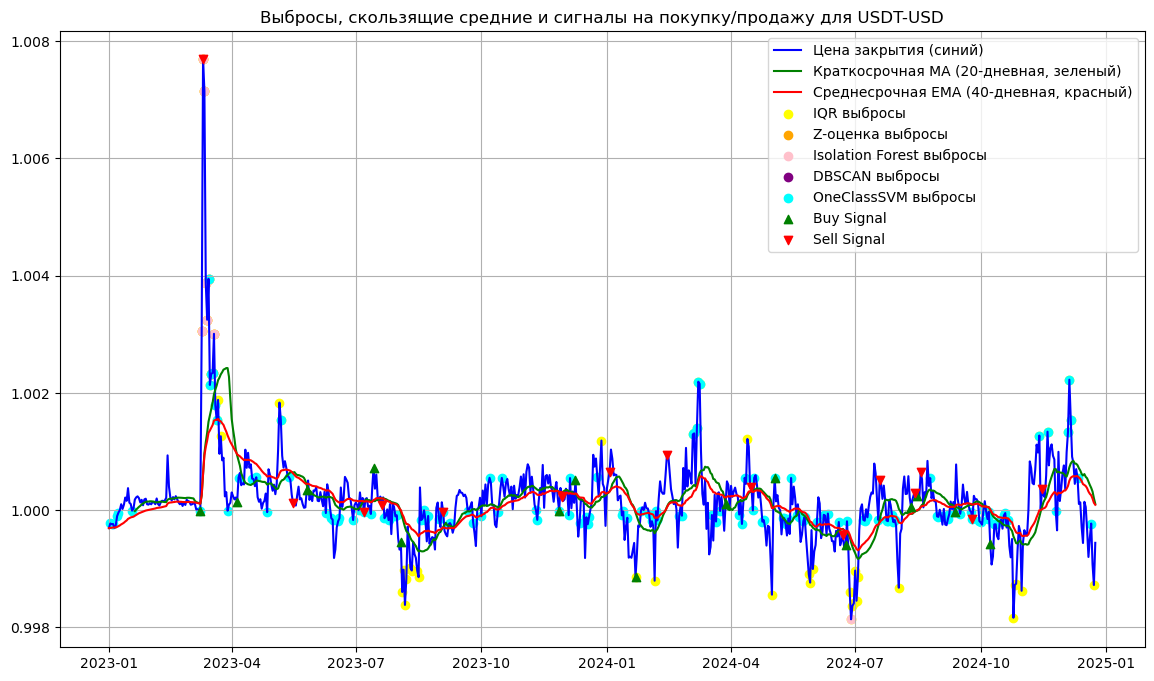

In [89]:
# Анализ выбросов для криптовалют
print("\033[1;34m4. Анализ выбросов в загруженых данных, скользящие средние и сигналы на покупку/продажу для криптовалют\033[0m")
print("Сигналы на покупку/продажу определяются при пересечении 20-дневной простой средней и 40-дневной экспоненциальной средней")
crypto_outliers = {crypto: {} for crypto in cryptos}
crypto_skewness_kurtosis = {crypto: {} for crypto in cryptos}
for crypto in cryptos:
    crypto_series = crypto_data[crypto]
    iqr_outliers = detect_outliers_iqr(crypto_series)
    zscore_outliers = detect_outliers_zscore(crypto_series)
    isolation_forest_outliers = detect_outliers_isolation_forest(crypto_series)
    dbscan_outliers = detect_outliers_dbscan(crypto_series)
    oneclasssvm_outliers = detect_outliers_oneclasssvm(crypto_series)

    # Сохранение количества выбросов
    crypto_outliers[crypto] = {
        "IQR": len(iqr_outliers),
        "Z-оценка": len(zscore_outliers),
        "Isolation Forest": len(isolation_forest_outliers),
        "DBSCAN": len(dbscan_outliers),
        "OneClassSVM": len(oneclasssvm_outliers)
    }

    # Оценка асимметрии и эксцесса
    crypto_skewness_kurtosis[crypto] = check_skewness_kurtosis(crypto_series)

    # Визуализация выбросов для всех методов на одном графике
    short_term, medium_term, buy_signal, sell_signal = analyze_trading(crypto_series, short_window, medium_window)
    plot_data_with_outliers(crypto_series, iqr_outliers, zscore_outliers, isolation_forest_outliers, dbscan_outliers, oneclasssvm_outliers, short_term, medium_term, buy_signal, sell_signal, f"Выбросы, скользящие средние и сигналы на покупку/продажу для {crypto}")

# Разделительная сплошная линия между данными по инструментам
print("=" * 100)

5. Boxplot для ценн закрытия дня по акциям и криптовалютам


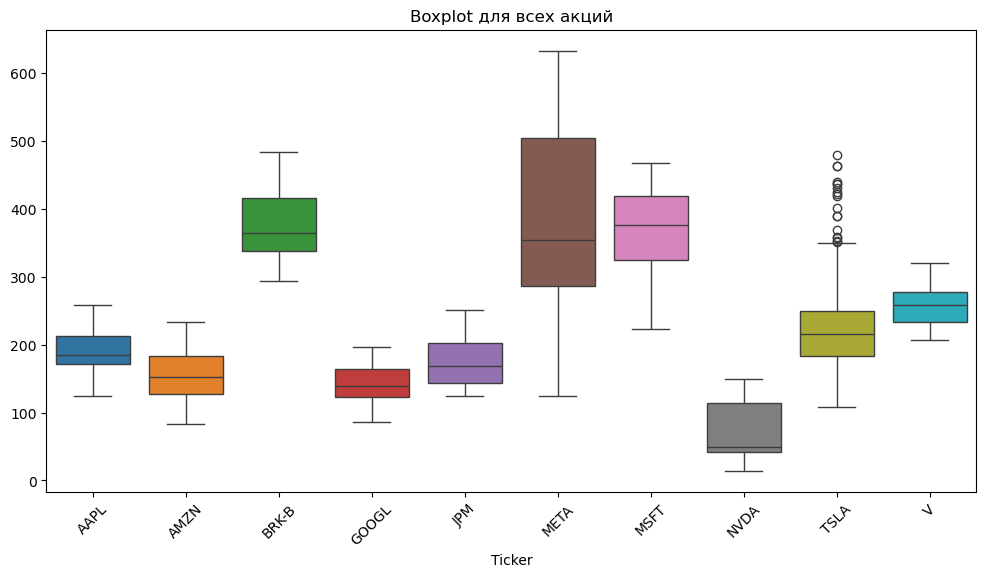

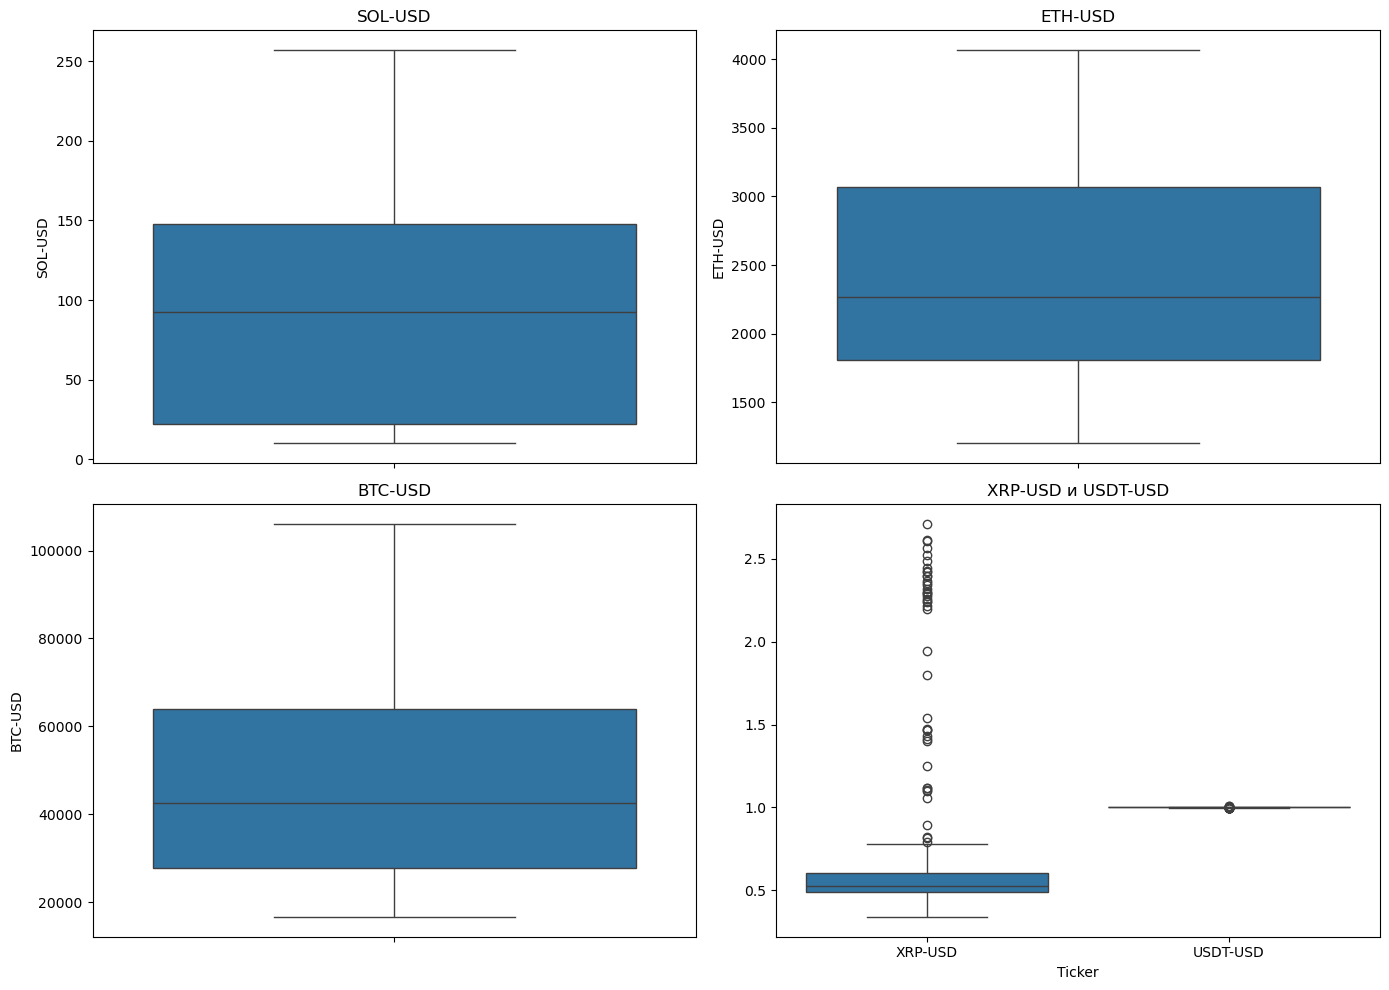

In [100]:
print("\033[1;34m5. Boxplot для ценн закрытия дня по акциям и криптовалютам\033[0m")
# Визуализация Boxplot для всех акций
plot_boxplot_stocks(stock_data)

# Визуализация Boxplot для криптовалют в квадрате 2x2
plot_boxplot_cryptos_2x2(crypto_data)

In [101]:
print("\033[1;34m6. Проверка нормального распределения для ценн закрытия дня по акциям и криптовалютам\033[0m")
# Проверка нормального распределения
print("Проверка нормального распределения для акций:")
for stock in stocks:
    print(f"{stock}: {check_normality(stock_data[stock])}")

print("=" * 50)  # Сплошная горизонтальная линия

print("Проверка нормального распределения для криптовалют:")
for crypto in cryptos:
    print(f"{crypto}: {check_normality(crypto_data[crypto])}")

6. Проверка нормального распределения для ценн закрытия дня по акциям и криптовалютам
Проверка нормального распределения для акций:
AAPL: Не нормальное распределение (p=0.0000000017)
MSFT: Не нормальное распределение (p=0.0000000000)
GOOGL: Не нормальное распределение (p=0.0000000505)
AMZN: Не нормальное распределение (p=0.0000000001)
TSLA: Не нормальное распределение (p=0.0000000000)
BRK-B: Не нормальное распределение (p=0.0000000000)
NVDA: Не нормальное распределение (p=0.0000000000)
META: Не нормальное распределение (p=0.0000000000)
JPM: Не нормальное распределение (p=0.0000000000)
V: Не нормальное распределение (p=0.0000000000)
Проверка нормального распределения для криптовалют:
SOL-USD: Не нормальное распределение (p=0.0000000000)
ETH-USD: Не нормальное распределение (p=0.0000000000)
BTC-USD: Не нормальное распределение (p=0.0000000000)
XRP-USD: Не нормальное распределение (p=0.0000000000)
USDT-USD: Не нормальное распределение (p=0.0000000000)


In [102]:
print("\033[1;34m7. Анализ краткосрочной и среднесрочной торговли для акций и криптовалют\033[0m")
# Анализ краткосрочной и среднесрочной торговли
print("Анализ краткосрочной и среднесрочной торговли для акций с помощью функция tail(). Полезно для проверки результатов расчетов.")
short_term_stocks, medium_term_stocks, buy_signal_stocks, sell_signal_stocks = analyze_trading(stock_data, short_window, medium_window)

print("Краткосрочная MA для акций:")
print(short_term_stocks.tail())

print("Среднесрочная EMA для акций:")
print(medium_term_stocks.tail())

print("Сигналы на покупку для акций:")
print(buy_signal_stocks.tail())
print("Сигналы на продажу для акций:")
print(sell_signal_stocks.tail())

print("=" * 50)  # Сплошная горизонтальная линия

print("Анализ краткосрочной и среднесрочной торговли для криптовалют с помощью функция tail(). Полезно для проверки результатов расчетов.")
short_term_cryptos, medium_term_cryptos, buy_signal_cryptos, sell_signal_cryptos = analyze_trading(crypto_data, short_window, medium_window)

print("Краткосрочная MA для криптовалют:")
print(short_term_cryptos.tail())

print("Среднесрочная EMA для криптовалют:")
print(medium_term_cryptos.tail())

print("Сигналы на покупку для криптовалют:")
print(buy_signal_cryptos.tail())

print("Сигналы на продажу для криптовалют:")
print(sell_signal_cryptos.tail())

print("=" * 50)  # Сплошная горизонтальная линия

7. Анализ краткосрочной и среднесрочной торговли для акций и криптовалют
Анализ краткосрочной и среднесрочной торговли для акций с помощью функция tail(). Полезно для проверки результатов расчетов.
Краткосрочная MA для акций:
Ticker            AAPL        AMZN       BRK-B       GOOGL         JPM  \
Date                                                                     
2024-12-18  241.418999  216.681500  467.909499  178.303499  244.057499   
2024-12-19  242.458498  217.702000  466.934999  178.929999  243.666499   
2024-12-20  243.756998  219.028999  465.992000  180.118999  243.308500   
2024-12-23  245.026999  220.425999  464.881000  181.612499  242.800500   
2024-12-24  246.293500  221.806000  463.942500  183.035500  242.401500   

Ticker            META        MSFT        NVDA        TSLA           V  
Date                                                                    
2024-12-18  599.023004  435.149498  138.432500  383.357001  312.453001  
2024-12-19  600.525504  436.226498  

8. Визуализация распределения данных для акций и криптовалют
Визуализация распределения данных для акций


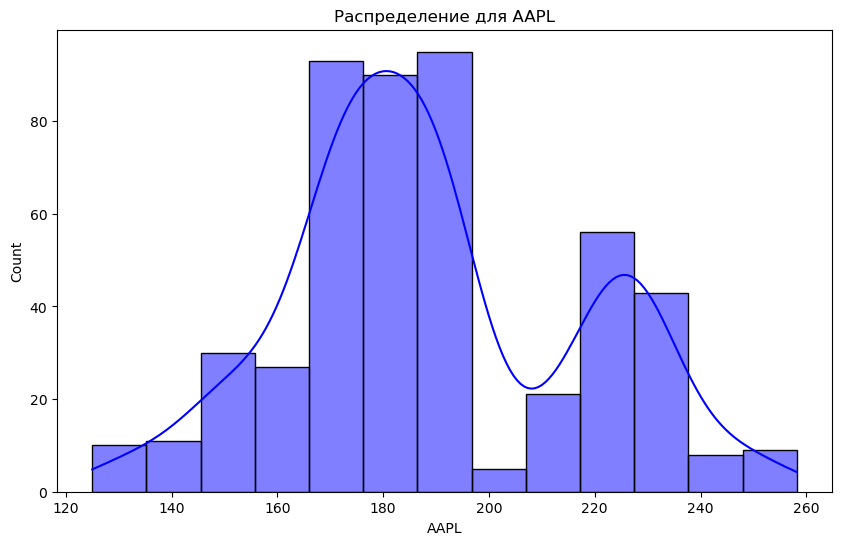

<Figure size 1000x600 with 0 Axes>

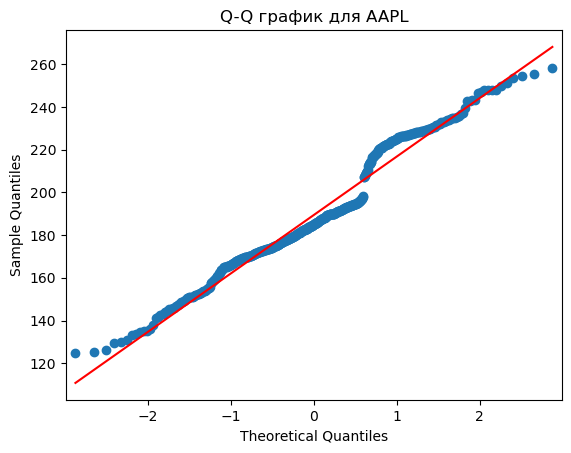

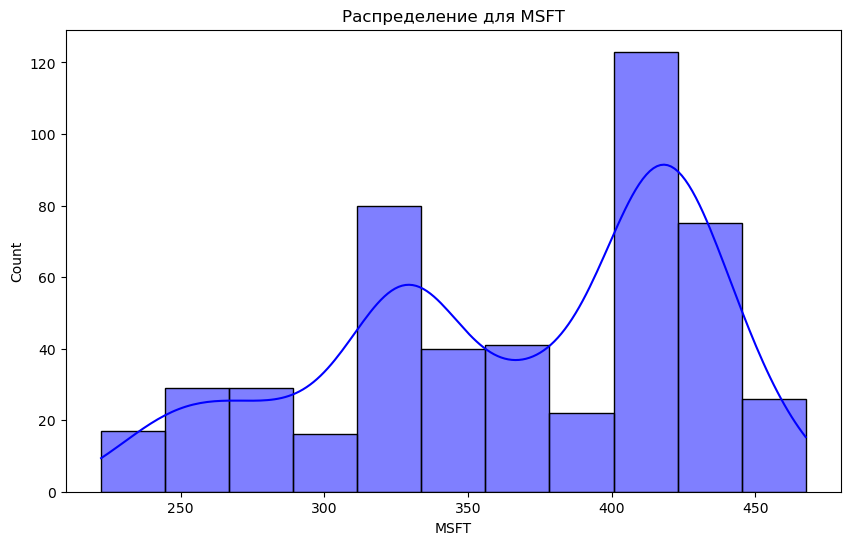

<Figure size 1000x600 with 0 Axes>

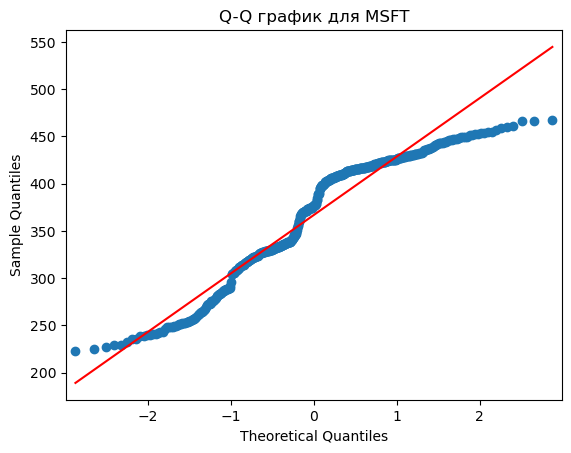

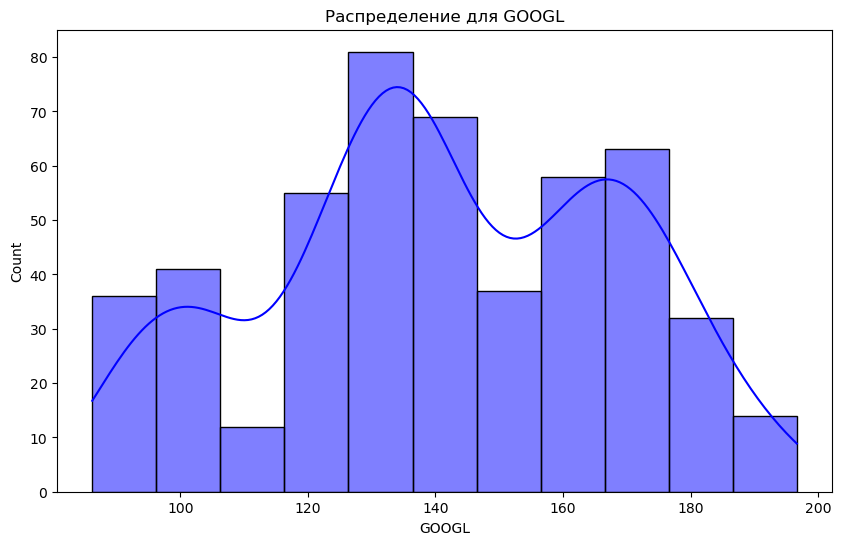

<Figure size 1000x600 with 0 Axes>

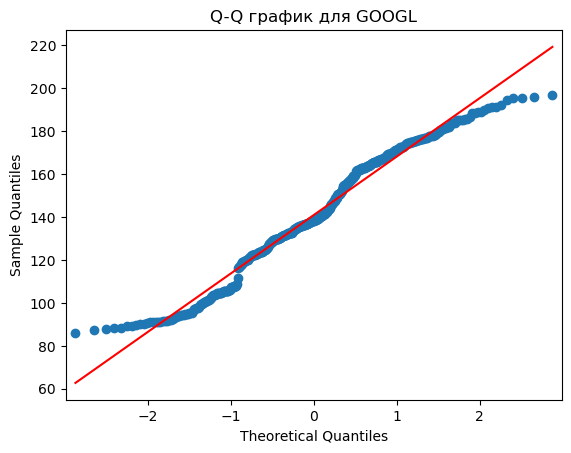

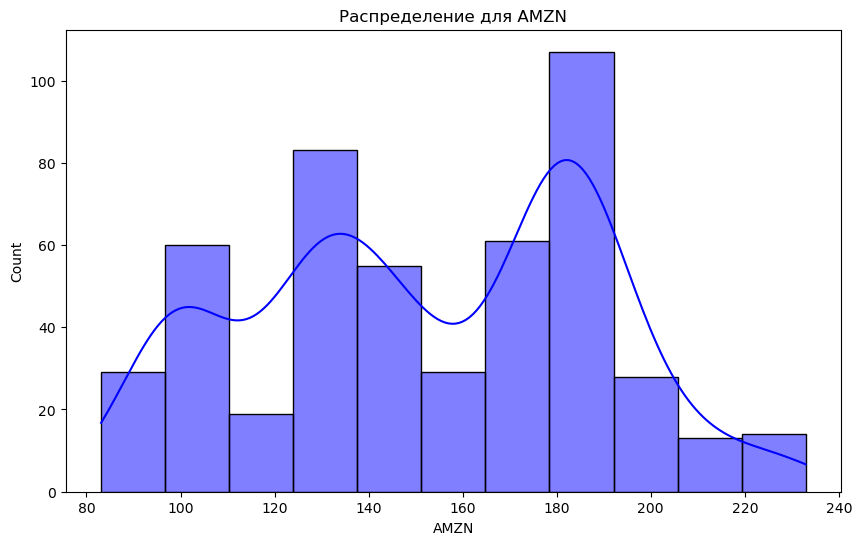

<Figure size 1000x600 with 0 Axes>

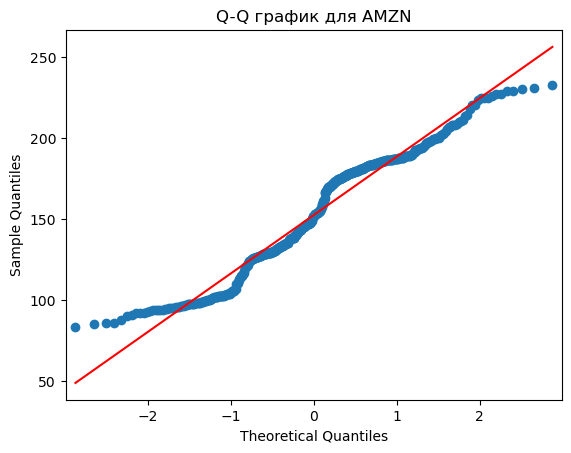

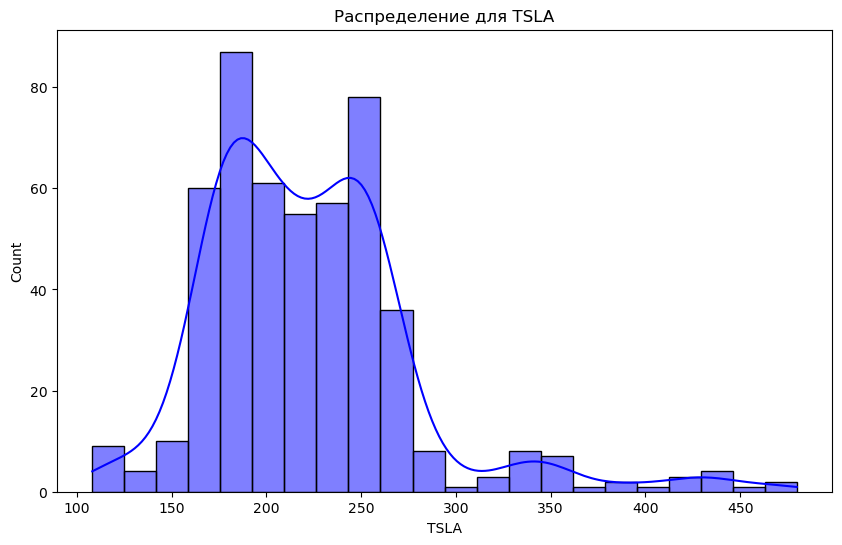

<Figure size 1000x600 with 0 Axes>

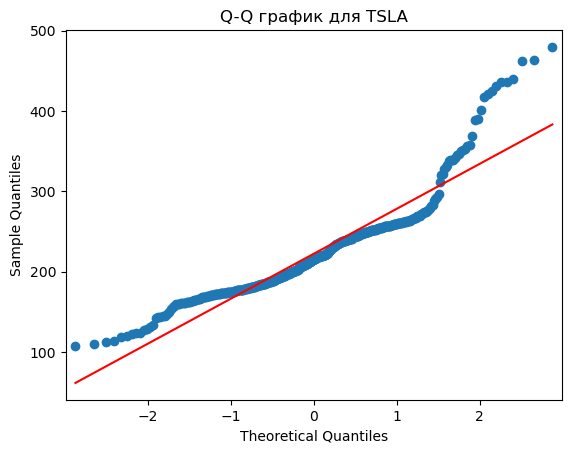

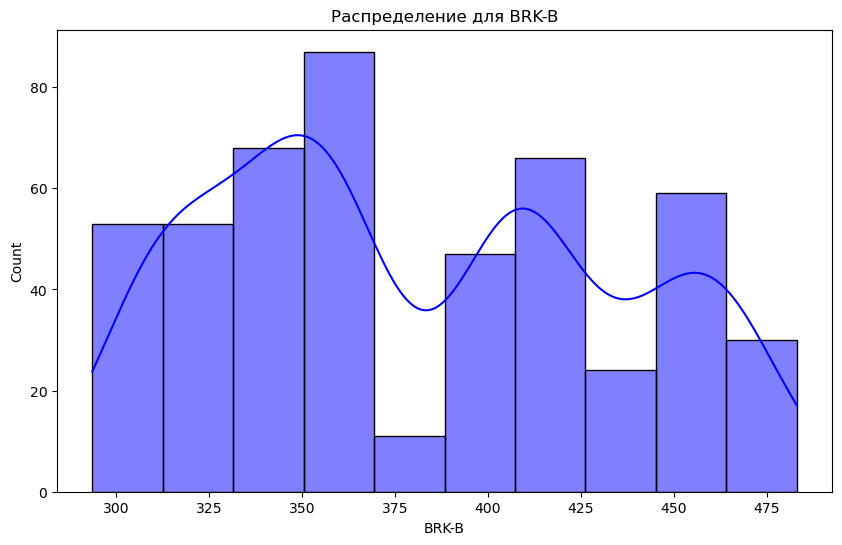

<Figure size 1000x600 with 0 Axes>

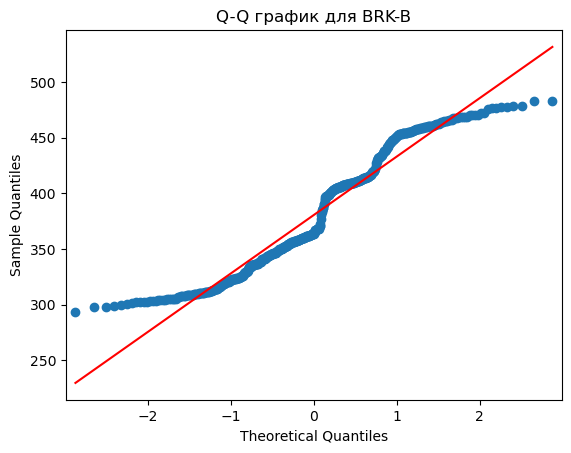

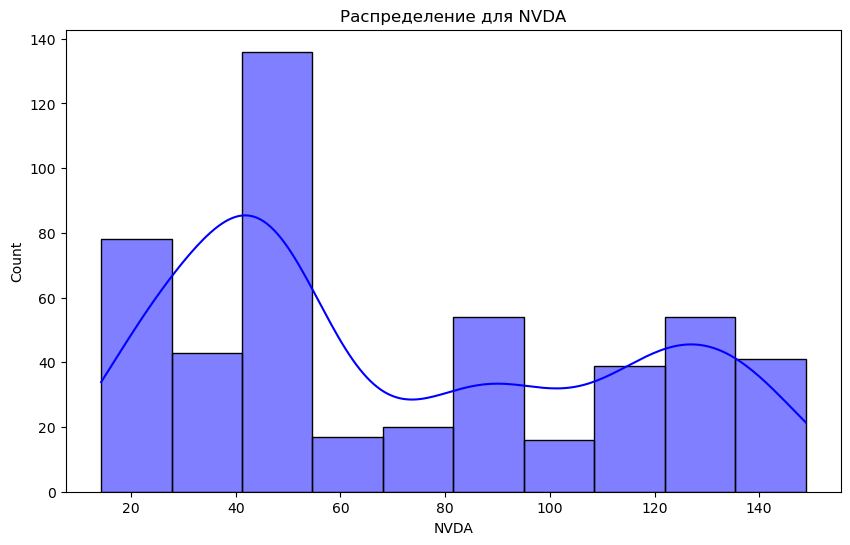

<Figure size 1000x600 with 0 Axes>

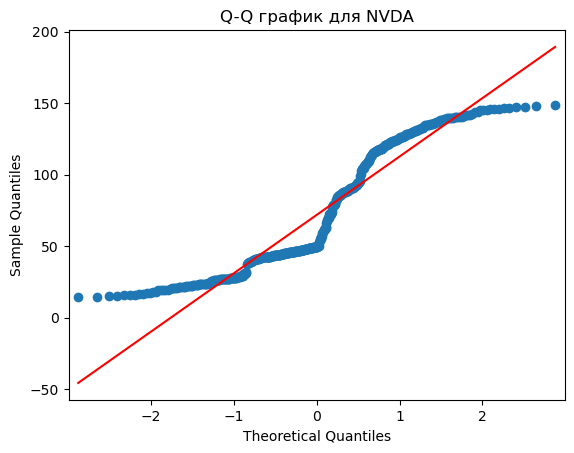

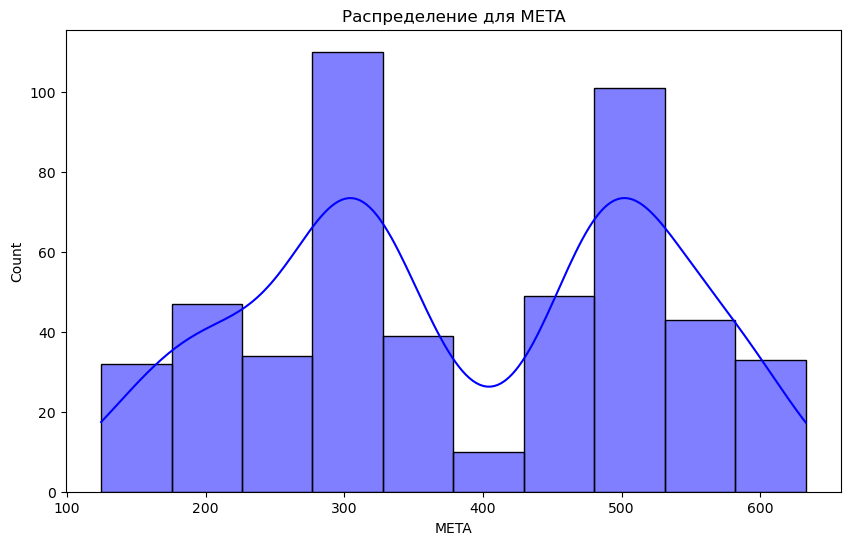

<Figure size 1000x600 with 0 Axes>

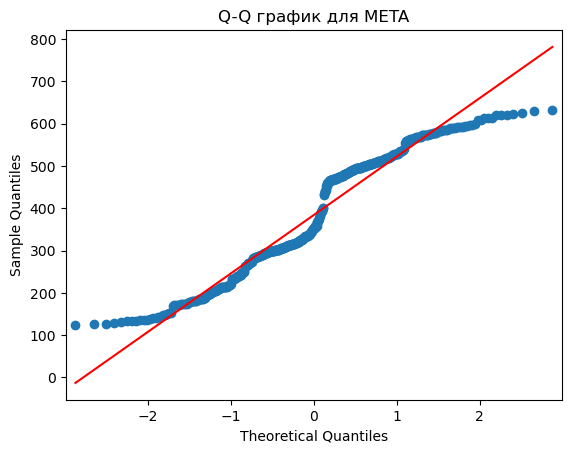

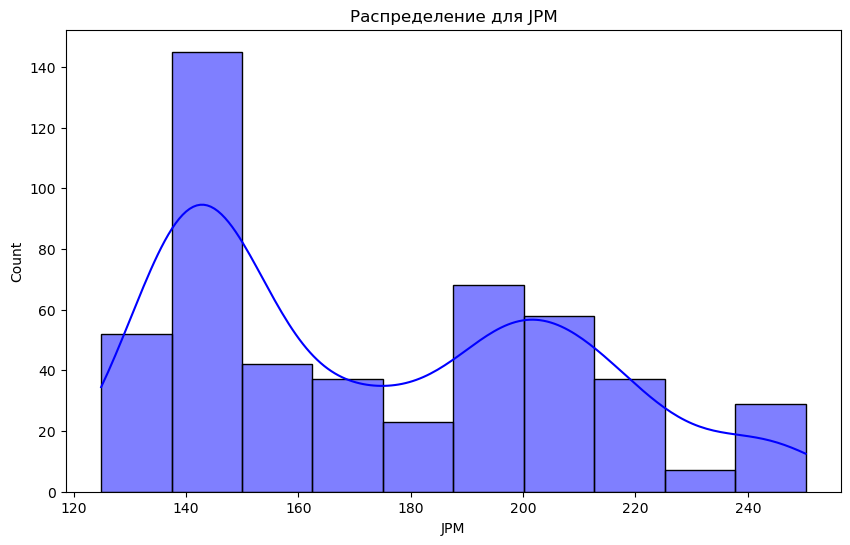

<Figure size 1000x600 with 0 Axes>

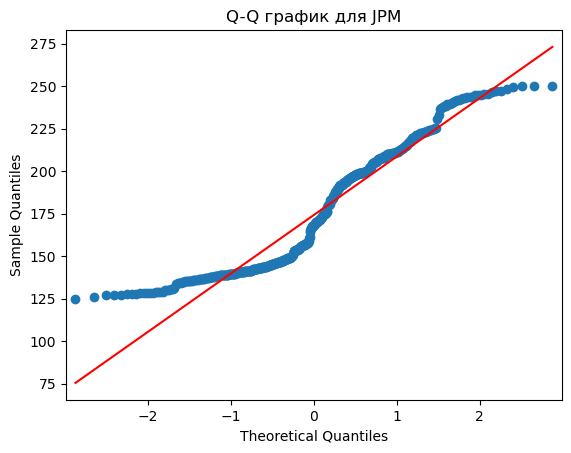

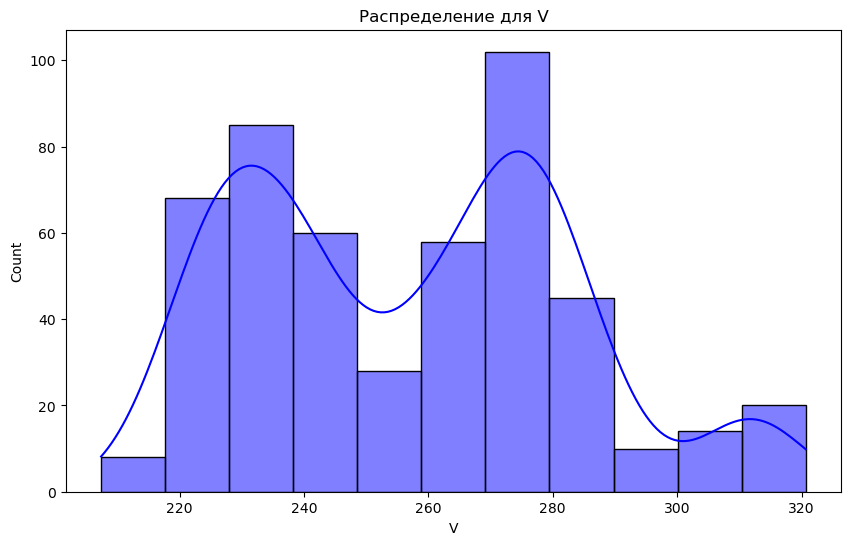

<Figure size 1000x600 with 0 Axes>

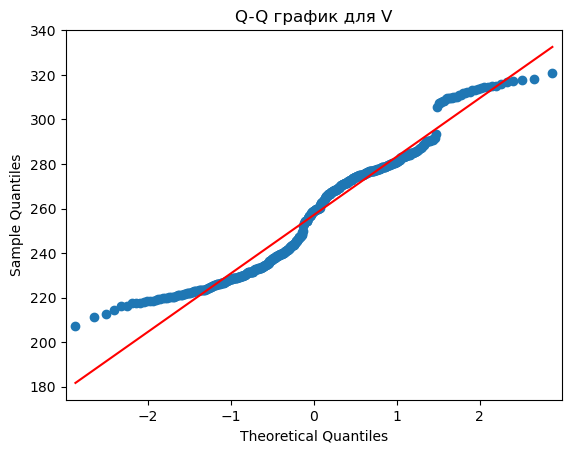

Визуализация распределения данных для криптовалют:


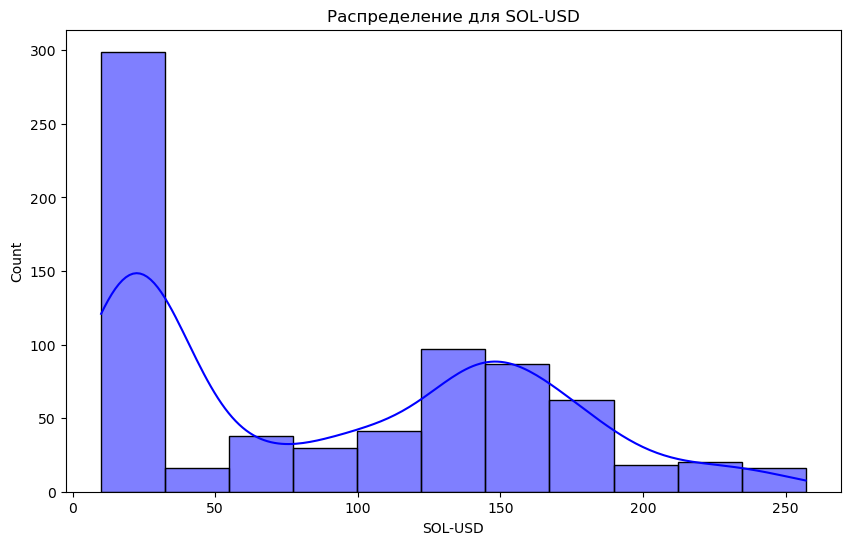

<Figure size 1000x600 with 0 Axes>

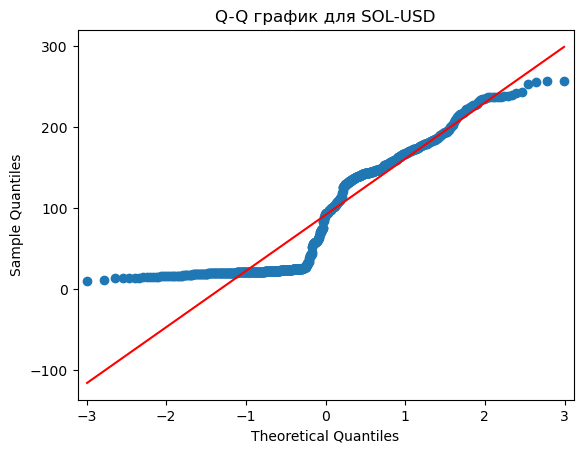

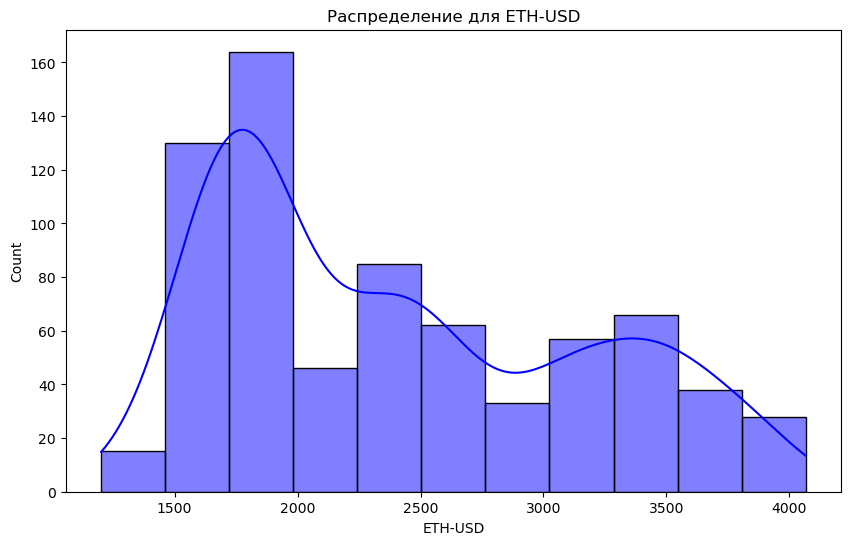

<Figure size 1000x600 with 0 Axes>

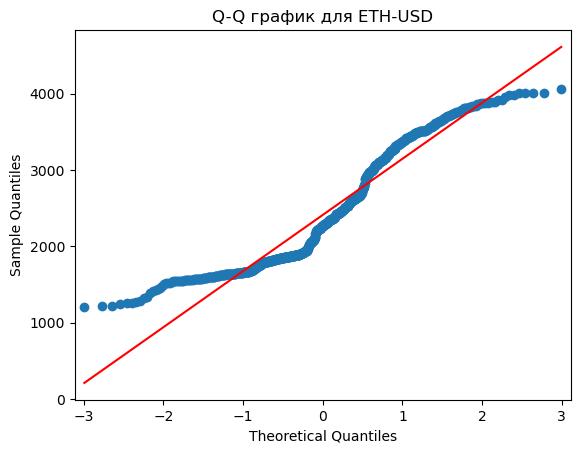

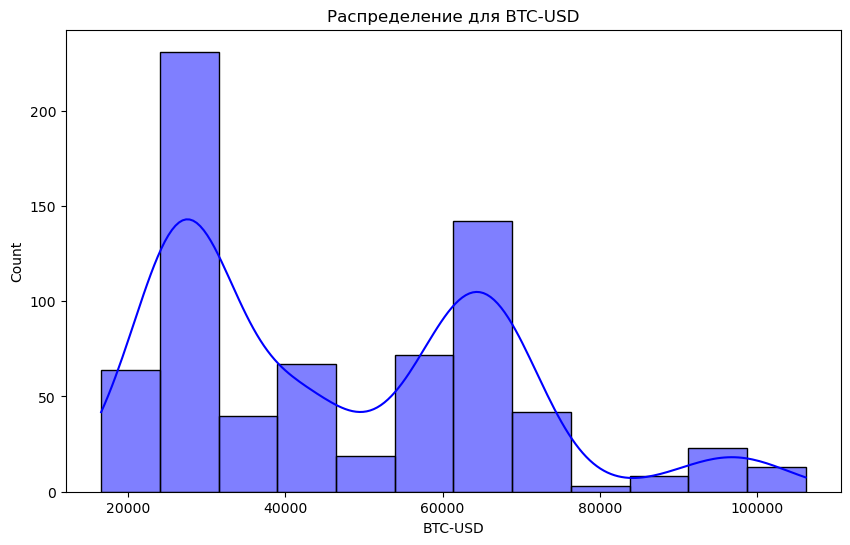

<Figure size 1000x600 with 0 Axes>

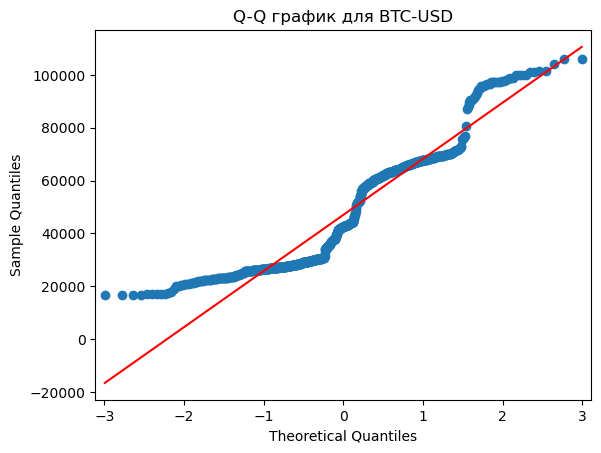

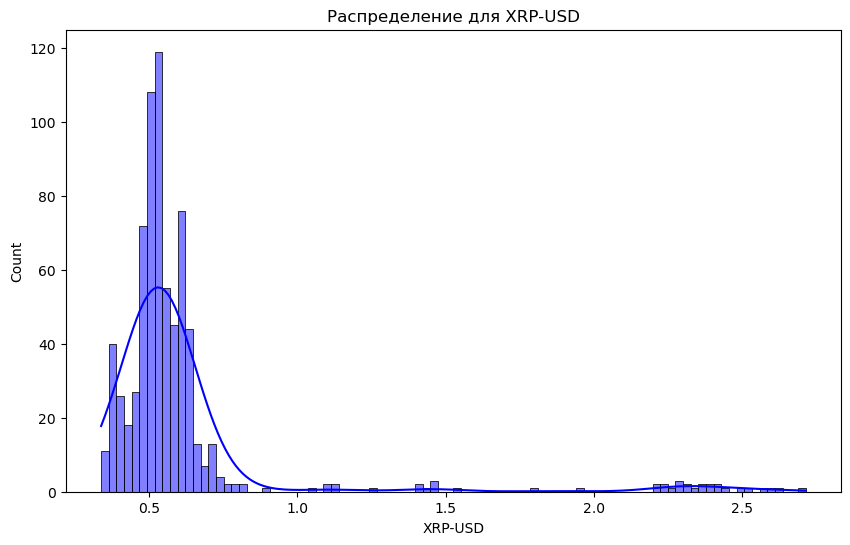

<Figure size 1000x600 with 0 Axes>

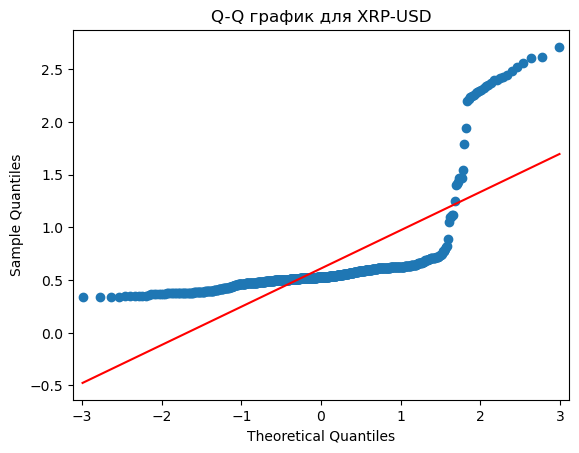

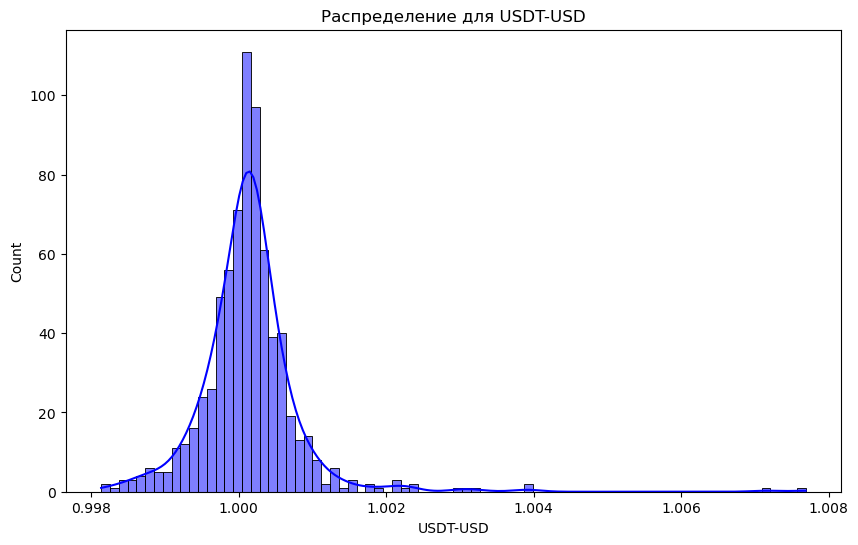

<Figure size 1000x600 with 0 Axes>

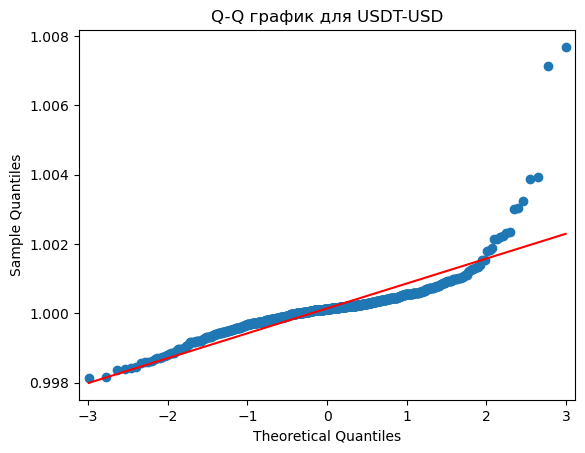

In [103]:
print("\033[1;34m8. Визуализация распределения данных для акций и криптовалют\033[0m")

# Визуализация распределения данных для акций
print("Визуализация распределения данных для акций")
for stock in stocks:
    plot_distribution(stock_data[stock], f"Распределение для {stock}")
    plot_qq_plot(stock_data[stock], f"Q-Q график для {stock}")

# Визуализация распределения данных для криптовалют
print("Визуализация распределения данных для криптовалют:")
for crypto in cryptos:
    plot_distribution(crypto_data[crypto], f"Распределение для {crypto}")
    plot_qq_plot(crypto_data[crypto], f"Q-Q график для {crypto}")

In [104]:
print("\033[1;34m9. Проверка нормальности распределения с использованием статистических тестов для акций и криптовалют\033[0m")

# Проверка нормальности с использованием статистических тестов для акций
print("Проверка нормальности с использованием статистических тестов для акций:")
stock_results_df = pd.DataFrame(stock_outliers).T
print(stock_results_df)

# Проверка нормальности с использованием статистических тестов для криптовалют
print("Проверка нормальности с использованием статистических тестов для криптовалют:")
crypto_results_df = pd.DataFrame(crypto_outliers).T
print(crypto_results_df)

9. Проверка нормальности распределения с использованием статистических тестов для акций и криптовалют
Проверка нормальности с использованием статистических тестов для акций:
       IQR  Z-оценка  Isolation Forest  DBSCAN  OneClassSVM
AAPL     0         0                 5     107          110
MSFT     0         0                 5     245           76
GOOGL    0         0                 5      78           75
AMZN     0         0                 5     122           58
TSLA    18        11                 5     184           78
BRK-B    0         0                 5     180           26
NVDA     0         0                 5     139            8
META     0         0                 5     424           32
JPM      0         0                 5     109           25
V        0         0                 5      59           27
Проверка нормальности с использованием статистических тестов для криптовалют:
          IQR  Z-оценка  Isolation Forest  DBSCAN  OneClassSVM
SOL-USD     0         0  

In [105]:
print("\033[1;34m10. Оценки асимметрии и эксцесса для акций и криптовалют\033[0m")
# Оценка асимметрии и эксцесса для акций
print("Оценка асимметрии и эксцесса для акций:")
stock_skewness_kurtosis_df = pd.DataFrame(stock_skewness_kurtosis).T
print(stock_skewness_kurtosis_df)

# Оценка асимметрии и эксцесса для криптовалют
print("Оценка асимметрии и эксцесса для криптовалют:")
crypto_skewness_kurtosis_df = pd.DataFrame(crypto_skewness_kurtosis).T
print(crypto_skewness_kurtosis_df)

10. Оценки асимметрии и эксцесса для акций и криптовалют
Оценка асимметрии и эксцесса для акций:
       Асимметрия   Эксцесс
AAPL     0.286792 -0.469880
MSFT    -0.511858 -0.866756
GOOGL   -0.106723 -0.862023
AMZN    -0.051838 -1.017564
TSLA     1.489454  3.880725
BRK-B    0.229537 -1.193838
NVDA     0.415899 -1.290993
META    -0.051868 -1.251049
JPM      0.446474 -1.053476
V        0.310484 -0.763273
Оценка асимметрии и эксцесса для криптовалют:
          Асимметрия    Эксцесс
SOL-USD     0.363292  -1.226965
ETH-USD     0.530054  -1.002531
BTC-USD     0.626711  -0.464638
XRP-USD     4.187112  17.525501
USDT-USD    3.519394  31.361964
